In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import math 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style( 'white' )

In [2]:
df = pd.read_csv('dat_train.csv', encoding = 'utf-8')

In [3]:
labels = pd.read_csv('dat_labels.csv', encoding = 'utf-8')

In [4]:
df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E193,E194,E195,E196,E197,E198,E199,E200,E201,E202
0,-50000,-50000,-50000,-50000,-50000,-50000,-50000.000,-50000.000,-50000.000,-50000.000,...,6395.050700,2484.7603,-1861.4566,-6731.2125,-12046.7980,-18118.910,-24864.072,-32337.536,-40682.626,-50000.0
1,-50000,-50000,-50000,-50000,-50000,-50000,-50000.000,-50000.000,-50000.000,-49967.101,...,-95.501148,-3766.9146,-7746.5149,-12153.5270,-17024.7000,-22390.318,-28316.780,-34849.007,-42066.263,-50000.0
2,-50000,-50000,-50000,-50000,-50000,-50000,-49985.375,-49942.063,-49942.063,-49942.063,...,9650.349100,5562.4573,1016.5281,-4110.9001,-9844.9019,-16270.369,-23486.320,-31459.797,-40286.129,-50000.0
3,-50000,-50000,-50000,-50000,-50000,-50000,-49945.235,-49936.509,-49911.008,-49861.916,...,-11740.289000,-14833.9000,-18250.5580,-21820.2790,-25653.7370,-29838.125,-34320.533,-39129.947,-44367.236,-50000.0
4,-50000,-50000,-50000,-50000,-50000,-50000,-49972.586,-49928.954,-49904.050,-49865.769,...,-12364.765000,-15502.5410,-18829.8080,-22370.1300,-26217.2340,-30259.430,-34665.118,-39427.480,-44557.786,-50000.0


In [5]:
df.columns

Index(['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
       ...
       'E193', 'E194', 'E195', 'E196', 'E197', 'E198', 'E199', 'E200', 'E201',
       'E202'],
      dtype='object', length=202)

In [6]:
df.shape

(14400, 202)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Columns: 202 entries, E1 to E202
dtypes: float64(189), int64(13)
memory usage: 22.2 MB


In [8]:
df.describe()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E193,E194,E195,E196,E197,E198,E199,E200,E201,E202
count,14400.0,14400.0,14400.0,14400.0,14400.0,14400.0,14400.000000,14400.000000,14400.000000,14400.000000,...,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000
mean,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-49986.887770,-49969.340137,-49947.815057,-49922.066663,...,-5169.638532,-8593.668814,-12298.867264,-16356.627842,-20768.523024,-25594.599836,-30892.638434,-36679.686511,-43046.808728,-49998.663050
std,0.0,0.0,0.0,0.0,0.0,0.0,20.038542,34.423306,54.437422,78.444127,...,12429.000744,12029.561807,11474.999353,10738.549099,9781.412633,8554.221334,7018.415971,5109.749219,2800.448318,2.740329
min,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-50000.000000,-50000.000000,-50000.000000,-50000.000000,...,-34634.800000,-36360.630000,-38102.538000,-39860.847000,-41552.655000,-43258.806000,-45002.959000,-46597.401000,-48426.217000,-50000.000000
25%,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-50000.000000,-50000.000000,-50000.000000,-49972.464250,...,-12452.871000,-15590.961000,-18856.834000,-22469.190000,-26271.833000,-30298.295250,-34700.086000,-39441.215750,-44523.306500,-50000.000000
50%,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-50000.000000,-49973.112000,-49951.400000,-49928.651500,...,-8307.772800,-11733.006500,-15387.827500,-19320.767000,-23543.849500,-28070.528500,-32967.277000,-38220.023500,-43896.100000,-50000.000000
75%,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-49977.773750,-49946.110000,-49921.118000,-49893.693000,...,2927.064750,-950.231690,-5199.860875,-9913.789275,-15069.505250,-20790.887500,-27089.975500,-34028.143750,-41650.612250,-50000.000000
max,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-49852.488000,-49682.823000,-49459.231000,-49241.423000,...,26709.185000,23205.754000,18993.618000,13925.732000,7701.192800,361.069470,-8819.777800,-19940.652000,-33453.402000,-49984.809000


In [9]:
labels.head()

,sigma,eta
0,0.650000,0.666667
1,0.741667,0.483333
2,0.566667,0.808333
3,0.850000,0.108333
4,0.300000,0.108333


In [10]:
labels.columns

Index(['sigma', 'eta'], dtype='object')

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
import np_utils
from tensorflow.keras.optimizers import Adam, SGD

In [12]:
X = df
y = labels

In [13]:
print(X.shape, y.shape)

(14400, 202) (14400, 2)


In [14]:
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

exp = pd.read_csv('exp_validation_10_1.csv', sep=',', engine='python')
X_exp = exp.drop(['sigma','eta'], 1)
cols = np.r_[:, 0:202]
y_exp = exp.drop(exp.columns[cols],axis=1)

X_exp_train = X_exp.iloc[0:25]
y_exp_train = y_exp.iloc[0:25]

X_exp_valid = X_exp.iloc[26:50]
y_exp_valid = y_exp.iloc[26:50]

X_train = X_train.append(X_exp_train)
y_train = y_train.append(y_exp_train)

X_valid = X_valid.append(X_exp_valid)
y_valid = y_valid.append(y_exp_valid)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

y1 = y_train.drop(['eta'], 1)
y2 = y_train.drop(['sigma'], 1)

y3 = y_valid.drop(['eta'], 1)
y4 = y_valid.drop(['sigma'], 1)

In [15]:
print(X_train_scaled.shape,X_test_scaled.shape,X_valid_scaled.shape,y_train.shape,y_test.shape,y_valid.shape)

(11545, 202) (1440, 202) (1464, 202) (11545, 2) (1440, 2) (1464, 2)


In [16]:
input_layer = Input(shape=X_train_scaled.shape[1:])
branch = Dense(202, activation='relu')(input_layer)

hidden1 = Dense(250, activation='relu')(branch)
hidden2 = Dense(250, activation='relu')(hidden1)
hidden3 = Dense(250, activation='relu')(hidden2)
hidden4 = Dense(250, activation='relu')(hidden3)
hidden5 = Dense(250, activation='relu')(hidden4)
hidden6 = Dense(250, activation='relu')(hidden5)
batch1 = BatchNormalization()(hidden6)
drop1 = Dropout(0.2)(batch1)
hidden7 = Dense(250, activation='relu')(drop1)
hidden8 = Dense(250, activation='relu')(hidden7)
hidden9 = Dense(250, activation='relu')(hidden8)
hidden10 = Dense(250, activation='relu')(hidden9)
sigma = Dense(units=1, activation='sigmoid', name='sigma')(hidden10)

hidden21 = Dense(250, activation='relu')(branch)
hidden22 = Dense(250, activation='relu')(hidden21)
hidden23 = Dense(250, activation='relu')(hidden22)
hidden24 = Dense(250, activation='relu')(hidden23)
hidden25 = Dense(250, activation='relu')(hidden24)
hidden26 = Dense(250, activation='relu')(hidden25)
batch2 = BatchNormalization()(hidden26)
drop2 = Dropout(0.2)(batch2)
hidden27 = Dense(250, activation='relu')(drop2)
hidden28 = Dense(250, activation='relu')(hidden27)
hidden29 = Dense(250, activation='relu')(hidden28)
hidden30 = Dense(250, activation='relu')(hidden29)
eta = Dense(units=1, activation='sigmoid', name='eta')(hidden30)

model = Model(inputs=input_layer, outputs=[sigma,eta])
model.compile(optimizer = SGD(lr = 0.0001),
              loss={'sigma': 'mse', 'eta': 'mse'},
              metrics={'sigma': 'mae', 'eta': 'mae'})

In [17]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 202)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 202)          41006       input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 250)          50750       dense[0][0]                      
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 250)          50750       dense[0][0]                      
______________________________________________________________________________________________

In [18]:
tf.keras.backend.clear_session()

from tensorflow.keras.callbacks import CSVLogger
csv_logger = CSVLogger('dat_training_3_2.log', separator=',', append=False)

model_history = model.fit(X_train_scaled, [y1, y2], callbacks=[csv_logger], epochs=4000 , batch_size = 32 , validation_data=(X_valid_scaled, [y3, y4]))

Epoch 1/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.1505 - sigma_loss: 0.0719 - eta_loss: 0.0786 - sigma_mae: 0.2298 - eta_mae: 0.2419 - val_loss: 0.1506 - val_sigma_loss: 0.0709 - val_eta_loss: 0.0798 - val_sigma_mae: 0.2296 - val_eta_mae: 0.2436
Epoch 2/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.1416 - sigma_loss: 0.0697 - eta_loss: 0.0720 - sigma_mae: 0.2260 - eta_mae: 0.2304 - val_loss: 0.1348 - val_sigma_loss: 0.0652 - val_eta_loss: 0.0696 - val_sigma_mae: 0.2165 - val_eta_mae: 0.2250
Epoch 3/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.1355 - sigma_loss: 0.0682 - eta_loss: 0.0673 - sigma_mae: 0.2236 - eta_mae: 0.2221 - val_loss: 0.1271 - val_sigma_loss: 0.0631 - val_eta_loss: 0.0641 - val_sigma_mae: 0.2122 - val_eta_mae: 0.2147
Epoch 4/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.1301 - sigma_loss: 0.0666 - eta_loss: 0.0636 - sigma_mae: 0.2207 - eta_mae: 0.2151 - val_loss: 0.121

Epoch 31/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0773 - sigma_loss: 0.0495 - eta_loss: 0.0277 - sigma_mae: 0.1871 - eta_mae: 0.1341 - val_loss: 0.0697 - val_sigma_loss: 0.0446 - val_eta_loss: 0.0250 - val_sigma_mae: 0.1765 - val_eta_mae: 0.1266
Epoch 32/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0758 - sigma_loss: 0.0490 - eta_loss: 0.0268 - sigma_mae: 0.1859 - eta_mae: 0.1313 - val_loss: 0.0675 - val_sigma_loss: 0.0439 - val_eta_loss: 0.0236 - val_sigma_mae: 0.1747 - val_eta_mae: 0.1225
Epoch 33/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0747 - sigma_loss: 0.0484 - eta_loss: 0.0263 - sigma_mae: 0.1846 - eta_mae: 0.1302 - val_loss: 0.0663 - val_sigma_loss: 0.0433 - val_eta_loss: 0.0229 - val_sigma_mae: 0.1736 - val_eta_mae: 0.1210
Epoch 34/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0737 - sigma_loss: 0.0481 - eta_loss: 0.0256 - sigma_mae: 0.1839 - eta_mae: 0.1284 - val_loss: 0

Epoch 61/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0534 - sigma_loss: 0.0386 - eta_loss: 0.0148 - sigma_mae: 0.1599 - eta_mae: 0.0963 - val_loss: 0.0457 - val_sigma_loss: 0.0335 - val_eta_loss: 0.0122 - val_sigma_mae: 0.1489 - val_eta_mae: 0.0863
Epoch 62/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0528 - sigma_loss: 0.0383 - eta_loss: 0.0145 - sigma_mae: 0.1592 - eta_mae: 0.0958 - val_loss: 0.0455 - val_sigma_loss: 0.0332 - val_eta_loss: 0.0123 - val_sigma_mae: 0.1481 - val_eta_mae: 0.0867
Epoch 63/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0524 - sigma_loss: 0.0380 - eta_loss: 0.0145 - sigma_mae: 0.1585 - eta_mae: 0.0956 - val_loss: 0.0447 - val_sigma_loss: 0.0329 - val_eta_loss: 0.0118 - val_sigma_mae: 0.1473 - val_eta_mae: 0.0849
Epoch 64/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0516 - sigma_loss: 0.0378 - eta_loss: 0.0138 - sigma_mae: 0.1576 - eta_mae: 0.0933 - val_loss: 0

Epoch 91/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0410 - sigma_loss: 0.0317 - eta_loss: 0.0092 - sigma_mae: 0.1388 - eta_mae: 0.0759 - val_loss: 0.0340 - val_sigma_loss: 0.0268 - val_eta_loss: 0.0072 - val_sigma_mae: 0.1277 - val_eta_mae: 0.0645
Epoch 92/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0408 - sigma_loss: 0.0315 - eta_loss: 0.0093 - sigma_mae: 0.1383 - eta_mae: 0.0761 - val_loss: 0.0347 - val_sigma_loss: 0.0269 - val_eta_loss: 0.0078 - val_sigma_mae: 0.1280 - val_eta_mae: 0.0668
Epoch 93/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0401 - sigma_loss: 0.0311 - eta_loss: 0.0090 - sigma_mae: 0.1371 - eta_mae: 0.0751 - val_loss: 0.0334 - val_sigma_loss: 0.0264 - val_eta_loss: 0.0070 - val_sigma_mae: 0.1263 - val_eta_mae: 0.0633
Epoch 94/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0399 - sigma_loss: 0.0311 - eta_loss: 0.0088 - sigma_mae: 0.1367 - eta_mae: 0.0744 - val_loss: 0

Epoch 121/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0344 - sigma_loss: 0.0272 - eta_loss: 0.0073 - sigma_mae: 0.1240 - eta_mae: 0.0675 - val_loss: 0.0282 - val_sigma_loss: 0.0227 - val_eta_loss: 0.0054 - val_sigma_mae: 0.1135 - val_eta_mae: 0.0550
Epoch 122/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0346 - sigma_loss: 0.0275 - eta_loss: 0.0070 - sigma_mae: 0.1249 - eta_mae: 0.0663 - val_loss: 0.0282 - val_sigma_loss: 0.0227 - val_eta_loss: 0.0055 - val_sigma_mae: 0.1133 - val_eta_mae: 0.0552
Epoch 123/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0347 - sigma_loss: 0.0274 - eta_loss: 0.0073 - sigma_mae: 0.1241 - eta_mae: 0.0682 - val_loss: 0.0281 - val_sigma_loss: 0.0227 - val_eta_loss: 0.0055 - val_sigma_mae: 0.1130 - val_eta_mae: 0.0547
Epoch 124/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0341 - sigma_loss: 0.0271 - eta_loss: 0.0069 - sigma_mae: 0.1234 - eta_mae: 0.0659 - val_los

Epoch 151/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0314 - sigma_loss: 0.0251 - eta_loss: 0.0063 - sigma_mae: 0.1173 - eta_mae: 0.0631 - val_loss: 0.0249 - val_sigma_loss: 0.0203 - val_eta_loss: 0.0046 - val_sigma_mae: 0.1049 - val_eta_mae: 0.0499
Epoch 152/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0312 - sigma_loss: 0.0250 - eta_loss: 0.0062 - sigma_mae: 0.1168 - eta_mae: 0.0622 - val_loss: 0.0247 - val_sigma_loss: 0.0201 - val_eta_loss: 0.0047 - val_sigma_mae: 0.1041 - val_eta_mae: 0.0500
Epoch 153/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0311 - sigma_loss: 0.0249 - eta_loss: 0.0062 - sigma_mae: 0.1163 - eta_mae: 0.0624 - val_loss: 0.0248 - val_sigma_loss: 0.0202 - val_eta_loss: 0.0046 - val_sigma_mae: 0.1049 - val_eta_mae: 0.0498
Epoch 154/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0308 - sigma_loss: 0.0248 - eta_loss: 0.0060 - sigma_mae: 0.1163 - eta_mae: 0.0614 - val_los

Epoch 181/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0288 - sigma_loss: 0.0230 - eta_loss: 0.0057 - sigma_mae: 0.1106 - eta_mae: 0.0600 - val_loss: 0.0229 - val_sigma_loss: 0.0188 - val_eta_loss: 0.0042 - val_sigma_mae: 0.0999 - val_eta_mae: 0.0468
Epoch 182/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0292 - sigma_loss: 0.0235 - eta_loss: 0.0057 - sigma_mae: 0.1123 - eta_mae: 0.0598 - val_loss: 0.0227 - val_sigma_loss: 0.0185 - val_eta_loss: 0.0042 - val_sigma_mae: 0.0989 - val_eta_mae: 0.0467
Epoch 183/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0290 - sigma_loss: 0.0232 - eta_loss: 0.0058 - sigma_mae: 0.1109 - eta_mae: 0.0602 - val_loss: 0.0228 - val_sigma_loss: 0.0186 - val_eta_loss: 0.0042 - val_sigma_mae: 0.0994 - val_eta_mae: 0.0465
Epoch 184/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0286 - sigma_loss: 0.0231 - eta_loss: 0.0055 - sigma_mae: 0.1110 - eta_mae: 0.0592 - val_los

Epoch 211/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0278 - sigma_loss: 0.0223 - eta_loss: 0.0055 - sigma_mae: 0.1078 - eta_mae: 0.0583 - val_loss: 0.0212 - val_sigma_loss: 0.0172 - val_eta_loss: 0.0039 - val_sigma_mae: 0.0941 - val_eta_mae: 0.0445
Epoch 212/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0276 - sigma_loss: 0.0221 - eta_loss: 0.0055 - sigma_mae: 0.1072 - eta_mae: 0.0588 - val_loss: 0.0212 - val_sigma_loss: 0.0174 - val_eta_loss: 0.0038 - val_sigma_mae: 0.0947 - val_eta_mae: 0.0442
Epoch 213/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0276 - sigma_loss: 0.0222 - eta_loss: 0.0054 - sigma_mae: 0.1072 - eta_mae: 0.0580 - val_loss: 0.0216 - val_sigma_loss: 0.0176 - val_eta_loss: 0.0040 - val_sigma_mae: 0.0956 - val_eta_mae: 0.0448
Epoch 214/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0272 - sigma_loss: 0.0219 - eta_loss: 0.0053 - sigma_mae: 0.1068 - eta_mae: 0.0579 - val_los

Epoch 241/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0263 - sigma_loss: 0.0214 - eta_loss: 0.0049 - sigma_mae: 0.1053 - eta_mae: 0.0553 - val_loss: 0.0201 - val_sigma_loss: 0.0164 - val_eta_loss: 0.0037 - val_sigma_mae: 0.0907 - val_eta_mae: 0.0427
Epoch 242/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0263 - sigma_loss: 0.0211 - eta_loss: 0.0051 - sigma_mae: 0.1046 - eta_mae: 0.0564 - val_loss: 0.0200 - val_sigma_loss: 0.0163 - val_eta_loss: 0.0037 - val_sigma_mae: 0.0906 - val_eta_mae: 0.0427
Epoch 243/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0258 - sigma_loss: 0.0206 - eta_loss: 0.0052 - sigma_mae: 0.1026 - eta_mae: 0.0570 - val_loss: 0.0199 - val_sigma_loss: 0.0163 - val_eta_loss: 0.0036 - val_sigma_mae: 0.0903 - val_eta_mae: 0.0425
Epoch 244/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0258 - sigma_loss: 0.0205 - eta_loss: 0.0053 - sigma_mae: 0.1023 - eta_mae: 0.0576 - val_los

Epoch 271/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0246 - sigma_loss: 0.0199 - eta_loss: 0.0047 - sigma_mae: 0.1007 - eta_mae: 0.0541 - val_loss: 0.0189 - val_sigma_loss: 0.0154 - val_eta_loss: 0.0034 - val_sigma_mae: 0.0870 - val_eta_mae: 0.0410
Epoch 272/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0254 - sigma_loss: 0.0204 - eta_loss: 0.0050 - sigma_mae: 0.1013 - eta_mae: 0.0557 - val_loss: 0.0187 - val_sigma_loss: 0.0154 - val_eta_loss: 0.0034 - val_sigma_mae: 0.0868 - val_eta_mae: 0.0403
Epoch 273/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0250 - sigma_loss: 0.0201 - eta_loss: 0.0049 - sigma_mae: 0.1003 - eta_mae: 0.0552 - val_loss: 0.0194 - val_sigma_loss: 0.0159 - val_eta_loss: 0.0035 - val_sigma_mae: 0.0889 - val_eta_mae: 0.0416
Epoch 274/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0248 - sigma_loss: 0.0202 - eta_loss: 0.0047 - sigma_mae: 0.1011 - eta_mae: 0.0541 - val_los

Epoch 301/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0236 - sigma_loss: 0.0192 - eta_loss: 0.0044 - sigma_mae: 0.0974 - eta_mae: 0.0525 - val_loss: 0.0179 - val_sigma_loss: 0.0147 - val_eta_loss: 0.0032 - val_sigma_mae: 0.0839 - val_eta_mae: 0.0389
Epoch 302/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0238 - sigma_loss: 0.0191 - eta_loss: 0.0047 - sigma_mae: 0.0972 - eta_mae: 0.0542 - val_loss: 0.0180 - val_sigma_loss: 0.0149 - val_eta_loss: 0.0032 - val_sigma_mae: 0.0844 - val_eta_mae: 0.0388
Epoch 303/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0240 - sigma_loss: 0.0193 - eta_loss: 0.0048 - sigma_mae: 0.0975 - eta_mae: 0.0544 - val_loss: 0.0178 - val_sigma_loss: 0.0147 - val_eta_loss: 0.0031 - val_sigma_mae: 0.0839 - val_eta_mae: 0.0383
Epoch 304/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0247 - sigma_loss: 0.0198 - eta_loss: 0.0048 - sigma_mae: 0.0989 - eta_mae: 0.0551 - val_los

Epoch 331/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0235 - sigma_loss: 0.0191 - eta_loss: 0.0044 - sigma_mae: 0.0968 - eta_mae: 0.0522 - val_loss: 0.0171 - val_sigma_loss: 0.0141 - val_eta_loss: 0.0030 - val_sigma_mae: 0.0809 - val_eta_mae: 0.0371
Epoch 332/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0233 - sigma_loss: 0.0190 - eta_loss: 0.0043 - sigma_mae: 0.0968 - eta_mae: 0.0517 - val_loss: 0.0172 - val_sigma_loss: 0.0142 - val_eta_loss: 0.0030 - val_sigma_mae: 0.0815 - val_eta_mae: 0.0372
Epoch 333/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0230 - sigma_loss: 0.0186 - eta_loss: 0.0044 - sigma_mae: 0.0959 - eta_mae: 0.0524 - val_loss: 0.0172 - val_sigma_loss: 0.0143 - val_eta_loss: 0.0030 - val_sigma_mae: 0.0816 - val_eta_mae: 0.0374
Epoch 334/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0233 - sigma_loss: 0.0188 - eta_loss: 0.0046 - sigma_mae: 0.0959 - eta_mae: 0.0534 - val_los

Epoch 361/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0227 - sigma_loss: 0.0181 - eta_loss: 0.0046 - sigma_mae: 0.0940 - eta_mae: 0.0539 - val_loss: 0.0165 - val_sigma_loss: 0.0137 - val_eta_loss: 0.0028 - val_sigma_mae: 0.0791 - val_eta_mae: 0.0359
Epoch 362/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0222 - sigma_loss: 0.0178 - eta_loss: 0.0044 - sigma_mae: 0.0933 - eta_mae: 0.0524 - val_loss: 0.0165 - val_sigma_loss: 0.0137 - val_eta_loss: 0.0029 - val_sigma_mae: 0.0791 - val_eta_mae: 0.0361
Epoch 363/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0226 - sigma_loss: 0.0180 - eta_loss: 0.0047 - sigma_mae: 0.0935 - eta_mae: 0.0538 - val_loss: 0.0164 - val_sigma_loss: 0.0135 - val_eta_loss: 0.0028 - val_sigma_mae: 0.0786 - val_eta_mae: 0.0359
Epoch 364/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0225 - sigma_loss: 0.0180 - eta_loss: 0.0046 - sigma_mae: 0.0932 - eta_mae: 0.0533 - val_los

Epoch 391/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0222 - sigma_loss: 0.0176 - eta_loss: 0.0045 - sigma_mae: 0.0922 - eta_mae: 0.0533 - val_loss: 0.0158 - val_sigma_loss: 0.0131 - val_eta_loss: 0.0027 - val_sigma_mae: 0.0763 - val_eta_mae: 0.0344
Epoch 392/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0221 - sigma_loss: 0.0177 - eta_loss: 0.0043 - sigma_mae: 0.0917 - eta_mae: 0.0519 - val_loss: 0.0158 - val_sigma_loss: 0.0131 - val_eta_loss: 0.0027 - val_sigma_mae: 0.0764 - val_eta_mae: 0.0344
Epoch 393/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0214 - sigma_loss: 0.0173 - eta_loss: 0.0041 - sigma_mae: 0.0908 - eta_mae: 0.0506 - val_loss: 0.0157 - val_sigma_loss: 0.0130 - val_eta_loss: 0.0027 - val_sigma_mae: 0.0759 - val_eta_mae: 0.0351
Epoch 394/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0221 - sigma_loss: 0.0179 - eta_loss: 0.0042 - sigma_mae: 0.0931 - eta_mae: 0.0511 - val_los

Epoch 421/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0211 - sigma_loss: 0.0170 - eta_loss: 0.0041 - sigma_mae: 0.0904 - eta_mae: 0.0502 - val_loss: 0.0156 - val_sigma_loss: 0.0129 - val_eta_loss: 0.0026 - val_sigma_mae: 0.0755 - val_eta_mae: 0.0338
Epoch 422/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0216 - sigma_loss: 0.0174 - eta_loss: 0.0042 - sigma_mae: 0.0911 - eta_mae: 0.0510 - val_loss: 0.0152 - val_sigma_loss: 0.0126 - val_eta_loss: 0.0026 - val_sigma_mae: 0.0742 - val_eta_mae: 0.0334
Epoch 423/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0208 - sigma_loss: 0.0167 - eta_loss: 0.0041 - sigma_mae: 0.0891 - eta_mae: 0.0501 - val_loss: 0.0155 - val_sigma_loss: 0.0128 - val_eta_loss: 0.0027 - val_sigma_mae: 0.0748 - val_eta_mae: 0.0346
Epoch 424/4000
361/361 [==============================] - 3s 7ms/step - loss: 0.0211 - sigma_loss: 0.0170 - eta_loss: 0.0041 - sigma_mae: 0.0895 - eta_mae: 0.0505 - val_los

Epoch 451/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0204 - sigma_loss: 0.0164 - eta_loss: 0.0040 - sigma_mae: 0.0885 - eta_mae: 0.0500 - val_loss: 0.0150 - val_sigma_loss: 0.0124 - val_eta_loss: 0.0025 - val_sigma_mae: 0.0731 - val_eta_mae: 0.0326
Epoch 452/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0204 - sigma_loss: 0.0162 - eta_loss: 0.0043 - sigma_mae: 0.0878 - eta_mae: 0.0515 - val_loss: 0.0149 - val_sigma_loss: 0.0123 - val_eta_loss: 0.0025 - val_sigma_mae: 0.0729 - val_eta_mae: 0.0328
Epoch 453/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0206 - sigma_loss: 0.0167 - eta_loss: 0.0039 - sigma_mae: 0.0889 - eta_mae: 0.0489 - val_loss: 0.0149 - val_sigma_loss: 0.0123 - val_eta_loss: 0.0025 - val_sigma_mae: 0.0725 - val_eta_mae: 0.0326
Epoch 454/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0203 - sigma_loss: 0.0162 - eta_loss: 0.0041 - sigma_mae: 0.0872 - eta_mae: 0.0502 - val_los

Epoch 481/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0208 - sigma_loss: 0.0169 - eta_loss: 0.0040 - sigma_mae: 0.0892 - eta_mae: 0.0495 - val_loss: 0.0145 - val_sigma_loss: 0.0120 - val_eta_loss: 0.0025 - val_sigma_mae: 0.0715 - val_eta_mae: 0.0325
Epoch 482/4000
361/361 [==============================] - 3s 8ms/step - loss: 0.0198 - sigma_loss: 0.0160 - eta_loss: 0.0038 - sigma_mae: 0.0870 - eta_mae: 0.0484 - val_loss: 0.0142 - val_sigma_loss: 0.0118 - val_eta_loss: 0.0024 - val_sigma_mae: 0.0703 - val_eta_mae: 0.0320
Epoch 483/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0203 - sigma_loss: 0.0165 - eta_loss: 0.0038 - sigma_mae: 0.0882 - eta_mae: 0.0484 - val_loss: 0.0145 - val_sigma_loss: 0.0121 - val_eta_loss: 0.0025 - val_sigma_mae: 0.0717 - val_eta_mae: 0.0319
Epoch 484/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0203 - sigma_loss: 0.0165 - eta_loss: 0.0039 - sigma_mae: 0.0872 - eta_mae: 0.0487 - val_los

Epoch 511/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0192 - sigma_loss: 0.0155 - eta_loss: 0.0037 - sigma_mae: 0.0852 - eta_mae: 0.0477 - val_loss: 0.0142 - val_sigma_loss: 0.0117 - val_eta_loss: 0.0025 - val_sigma_mae: 0.0702 - val_eta_mae: 0.0318
Epoch 512/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0197 - sigma_loss: 0.0159 - eta_loss: 0.0038 - sigma_mae: 0.0858 - eta_mae: 0.0484 - val_loss: 0.0140 - val_sigma_loss: 0.0116 - val_eta_loss: 0.0024 - val_sigma_mae: 0.0694 - val_eta_mae: 0.0310
Epoch 513/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0190 - sigma_loss: 0.0152 - eta_loss: 0.0038 - sigma_mae: 0.0842 - eta_mae: 0.0482 - val_loss: 0.0140 - val_sigma_loss: 0.0115 - val_eta_loss: 0.0024 - val_sigma_mae: 0.0691 - val_eta_mae: 0.0315
Epoch 514/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0189 - sigma_loss: 0.0152 - eta_loss: 0.0037 - sigma_mae: 0.0842 - eta_mae: 0.0479 - val_los

Epoch 541/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0190 - sigma_loss: 0.0151 - eta_loss: 0.0038 - sigma_mae: 0.0833 - eta_mae: 0.0483 - val_loss: 0.0134 - val_sigma_loss: 0.0111 - val_eta_loss: 0.0023 - val_sigma_mae: 0.0676 - val_eta_mae: 0.0301
Epoch 542/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0187 - sigma_loss: 0.0149 - eta_loss: 0.0038 - sigma_mae: 0.0829 - eta_mae: 0.0482 - val_loss: 0.0139 - val_sigma_loss: 0.0115 - val_eta_loss: 0.0024 - val_sigma_mae: 0.0690 - val_eta_mae: 0.0308
Epoch 543/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0190 - sigma_loss: 0.0153 - eta_loss: 0.0037 - sigma_mae: 0.0837 - eta_mae: 0.0476 - val_loss: 0.0135 - val_sigma_loss: 0.0112 - val_eta_loss: 0.0023 - val_sigma_mae: 0.0679 - val_eta_mae: 0.0305
Epoch 544/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0189 - sigma_loss: 0.0150 - eta_loss: 0.0039 - sigma_mae: 0.0827 - eta_mae: 0.0493 - val_los

Epoch 571/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0181 - sigma_loss: 0.0145 - eta_loss: 0.0036 - sigma_mae: 0.0813 - eta_mae: 0.0466 - val_loss: 0.0135 - val_sigma_loss: 0.0112 - val_eta_loss: 0.0023 - val_sigma_mae: 0.0674 - val_eta_mae: 0.0303
Epoch 572/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0184 - sigma_loss: 0.0145 - eta_loss: 0.0038 - sigma_mae: 0.0816 - eta_mae: 0.0487 - val_loss: 0.0132 - val_sigma_loss: 0.0109 - val_eta_loss: 0.0023 - val_sigma_mae: 0.0666 - val_eta_mae: 0.0307
Epoch 573/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0184 - sigma_loss: 0.0147 - eta_loss: 0.0037 - sigma_mae: 0.0817 - eta_mae: 0.0476 - val_loss: 0.0130 - val_sigma_loss: 0.0108 - val_eta_loss: 0.0023 - val_sigma_mae: 0.0662 - val_eta_mae: 0.0298
Epoch 574/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0180 - sigma_loss: 0.0144 - eta_loss: 0.0035 - sigma_mae: 0.0818 - eta_mae: 0.0469 - val_los

Epoch 601/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0182 - sigma_loss: 0.0145 - eta_loss: 0.0037 - sigma_mae: 0.0810 - eta_mae: 0.0479 - val_loss: 0.0127 - val_sigma_loss: 0.0105 - val_eta_loss: 0.0022 - val_sigma_mae: 0.0648 - val_eta_mae: 0.0294
Epoch 602/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0179 - sigma_loss: 0.0143 - eta_loss: 0.0037 - sigma_mae: 0.0801 - eta_mae: 0.0476 - val_loss: 0.0129 - val_sigma_loss: 0.0106 - val_eta_loss: 0.0023 - val_sigma_mae: 0.0653 - val_eta_mae: 0.0298
Epoch 603/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0180 - sigma_loss: 0.0145 - eta_loss: 0.0035 - sigma_mae: 0.0810 - eta_mae: 0.0460 - val_loss: 0.0126 - val_sigma_loss: 0.0104 - val_eta_loss: 0.0022 - val_sigma_mae: 0.0643 - val_eta_mae: 0.0292
Epoch 604/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0180 - sigma_loss: 0.0141 - eta_loss: 0.0040 - sigma_mae: 0.0800 - eta_mae: 0.0494 - val_los

Epoch 631/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0178 - sigma_loss: 0.0142 - eta_loss: 0.0036 - sigma_mae: 0.0801 - eta_mae: 0.0471 - val_loss: 0.0123 - val_sigma_loss: 0.0101 - val_eta_loss: 0.0022 - val_sigma_mae: 0.0633 - val_eta_mae: 0.0291
Epoch 632/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0172 - sigma_loss: 0.0137 - eta_loss: 0.0035 - sigma_mae: 0.0785 - eta_mae: 0.0463 - val_loss: 0.0124 - val_sigma_loss: 0.0103 - val_eta_loss: 0.0022 - val_sigma_mae: 0.0637 - val_eta_mae: 0.0290
Epoch 633/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0178 - sigma_loss: 0.0143 - eta_loss: 0.0035 - sigma_mae: 0.0803 - eta_mae: 0.0463 - val_loss: 0.0122 - val_sigma_loss: 0.0101 - val_eta_loss: 0.0021 - val_sigma_mae: 0.0629 - val_eta_mae: 0.0286
Epoch 634/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0174 - sigma_loss: 0.0139 - eta_loss: 0.0035 - sigma_mae: 0.0794 - eta_mae: 0.0462 - val_los

Epoch 661/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0171 - sigma_loss: 0.0137 - eta_loss: 0.0034 - sigma_mae: 0.0787 - eta_mae: 0.0459 - val_loss: 0.0120 - val_sigma_loss: 0.0098 - val_eta_loss: 0.0022 - val_sigma_mae: 0.0621 - val_eta_mae: 0.0286
Epoch 662/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0170 - sigma_loss: 0.0135 - eta_loss: 0.0035 - sigma_mae: 0.0775 - eta_mae: 0.0461 - val_loss: 0.0121 - val_sigma_loss: 0.0099 - val_eta_loss: 0.0022 - val_sigma_mae: 0.0623 - val_eta_mae: 0.0286
Epoch 663/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0166 - sigma_loss: 0.0132 - eta_loss: 0.0034 - sigma_mae: 0.0768 - eta_mae: 0.0461 - val_loss: 0.0122 - val_sigma_loss: 0.0101 - val_eta_loss: 0.0022 - val_sigma_mae: 0.0630 - val_eta_mae: 0.0289
Epoch 664/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0167 - sigma_loss: 0.0133 - eta_loss: 0.0034 - sigma_mae: 0.0770 - eta_mae: 0.0454 - val_los

Epoch 691/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0168 - sigma_loss: 0.0133 - eta_loss: 0.0035 - sigma_mae: 0.0770 - eta_mae: 0.0464 - val_loss: 0.0118 - val_sigma_loss: 0.0097 - val_eta_loss: 0.0021 - val_sigma_mae: 0.0614 - val_eta_mae: 0.0285
Epoch 692/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0169 - sigma_loss: 0.0135 - eta_loss: 0.0035 - sigma_mae: 0.0775 - eta_mae: 0.0464 - val_loss: 0.0117 - val_sigma_loss: 0.0096 - val_eta_loss: 0.0021 - val_sigma_mae: 0.0611 - val_eta_mae: 0.0283
Epoch 693/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0167 - sigma_loss: 0.0133 - eta_loss: 0.0033 - sigma_mae: 0.0777 - eta_mae: 0.0453 - val_loss: 0.0121 - val_sigma_loss: 0.0099 - val_eta_loss: 0.0021 - val_sigma_mae: 0.0621 - val_eta_mae: 0.0286
Epoch 694/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0167 - sigma_loss: 0.0134 - eta_loss: 0.0033 - sigma_mae: 0.0779 - eta_mae: 0.0450 - val_los

Epoch 721/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0165 - sigma_loss: 0.0132 - eta_loss: 0.0033 - sigma_mae: 0.0767 - eta_mae: 0.0451 - val_loss: 0.0116 - val_sigma_loss: 0.0095 - val_eta_loss: 0.0021 - val_sigma_mae: 0.0606 - val_eta_mae: 0.0287
Epoch 722/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0166 - sigma_loss: 0.0132 - eta_loss: 0.0034 - sigma_mae: 0.0761 - eta_mae: 0.0457 - val_loss: 0.0113 - val_sigma_loss: 0.0092 - val_eta_loss: 0.0021 - val_sigma_mae: 0.0593 - val_eta_mae: 0.0281
Epoch 723/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0165 - sigma_loss: 0.0130 - eta_loss: 0.0035 - sigma_mae: 0.0757 - eta_mae: 0.0466 - val_loss: 0.0115 - val_sigma_loss: 0.0094 - val_eta_loss: 0.0021 - val_sigma_mae: 0.0601 - val_eta_mae: 0.0279
Epoch 724/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0160 - sigma_loss: 0.0126 - eta_loss: 0.0034 - sigma_mae: 0.0749 - eta_mae: 0.0457 - val_los

Epoch 751/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0158 - sigma_loss: 0.0124 - eta_loss: 0.0033 - sigma_mae: 0.0738 - eta_mae: 0.0452 - val_loss: 0.0114 - val_sigma_loss: 0.0093 - val_eta_loss: 0.0021 - val_sigma_mae: 0.0599 - val_eta_mae: 0.0278
Epoch 752/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0159 - sigma_loss: 0.0127 - eta_loss: 0.0032 - sigma_mae: 0.0750 - eta_mae: 0.0442 - val_loss: 0.0114 - val_sigma_loss: 0.0093 - val_eta_loss: 0.0020 - val_sigma_mae: 0.0599 - val_eta_mae: 0.0277
Epoch 753/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0156 - sigma_loss: 0.0123 - eta_loss: 0.0032 - sigma_mae: 0.0741 - eta_mae: 0.0445 - val_loss: 0.0113 - val_sigma_loss: 0.0093 - val_eta_loss: 0.0020 - val_sigma_mae: 0.0598 - val_eta_mae: 0.0274
Epoch 754/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0160 - sigma_loss: 0.0128 - eta_loss: 0.0032 - sigma_mae: 0.0754 - eta_mae: 0.0446 - val_los

Epoch 781/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0157 - sigma_loss: 0.0124 - eta_loss: 0.0034 - sigma_mae: 0.0738 - eta_mae: 0.0455 - val_loss: 0.0107 - val_sigma_loss: 0.0087 - val_eta_loss: 0.0020 - val_sigma_mae: 0.0574 - val_eta_mae: 0.0271
Epoch 782/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0157 - sigma_loss: 0.0123 - eta_loss: 0.0034 - sigma_mae: 0.0739 - eta_mae: 0.0456 - val_loss: 0.0110 - val_sigma_loss: 0.0090 - val_eta_loss: 0.0020 - val_sigma_mae: 0.0585 - val_eta_mae: 0.0274
Epoch 783/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0159 - sigma_loss: 0.0126 - eta_loss: 0.0033 - sigma_mae: 0.0743 - eta_mae: 0.0450 - val_loss: 0.0109 - val_sigma_loss: 0.0088 - val_eta_loss: 0.0020 - val_sigma_mae: 0.0578 - val_eta_mae: 0.0275
Epoch 784/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0153 - sigma_loss: 0.0121 - eta_loss: 0.0032 - sigma_mae: 0.0730 - eta_mae: 0.0443 - val_los

Epoch 811/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0153 - sigma_loss: 0.0120 - eta_loss: 0.0033 - sigma_mae: 0.0733 - eta_mae: 0.0452 - val_loss: 0.0105 - val_sigma_loss: 0.0085 - val_eta_loss: 0.0020 - val_sigma_mae: 0.0568 - val_eta_mae: 0.0269
Epoch 812/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0153 - sigma_loss: 0.0121 - eta_loss: 0.0032 - sigma_mae: 0.0729 - eta_mae: 0.0443 - val_loss: 0.0107 - val_sigma_loss: 0.0087 - val_eta_loss: 0.0020 - val_sigma_mae: 0.0575 - val_eta_mae: 0.0269
Epoch 813/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0152 - sigma_loss: 0.0119 - eta_loss: 0.0033 - sigma_mae: 0.0729 - eta_mae: 0.0450 - val_loss: 0.0105 - val_sigma_loss: 0.0085 - val_eta_loss: 0.0019 - val_sigma_mae: 0.0566 - val_eta_mae: 0.0265
Epoch 814/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0149 - sigma_loss: 0.0117 - eta_loss: 0.0032 - sigma_mae: 0.0711 - eta_mae: 0.0442 - val_los

Epoch 841/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0146 - sigma_loss: 0.0114 - eta_loss: 0.0032 - sigma_mae: 0.0709 - eta_mae: 0.0444 - val_loss: 0.0104 - val_sigma_loss: 0.0085 - val_eta_loss: 0.0019 - val_sigma_mae: 0.0564 - val_eta_mae: 0.0264
Epoch 842/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0148 - sigma_loss: 0.0117 - eta_loss: 0.0031 - sigma_mae: 0.0717 - eta_mae: 0.0436 - val_loss: 0.0103 - val_sigma_loss: 0.0084 - val_eta_loss: 0.0020 - val_sigma_mae: 0.0558 - val_eta_mae: 0.0269
Epoch 843/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0150 - sigma_loss: 0.0118 - eta_loss: 0.0032 - sigma_mae: 0.0726 - eta_mae: 0.0442 - val_loss: 0.0102 - val_sigma_loss: 0.0082 - val_eta_loss: 0.0019 - val_sigma_mae: 0.0554 - val_eta_mae: 0.0267
Epoch 844/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0148 - sigma_loss: 0.0116 - eta_loss: 0.0031 - sigma_mae: 0.0711 - eta_mae: 0.0442 - val_los

Epoch 871/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0147 - sigma_loss: 0.0115 - eta_loss: 0.0032 - sigma_mae: 0.0711 - eta_mae: 0.0441 - val_loss: 0.0101 - val_sigma_loss: 0.0081 - val_eta_loss: 0.0019 - val_sigma_mae: 0.0551 - val_eta_mae: 0.0267
Epoch 872/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0144 - sigma_loss: 0.0115 - eta_loss: 0.0029 - sigma_mae: 0.0710 - eta_mae: 0.0422 - val_loss: 0.0100 - val_sigma_loss: 0.0080 - val_eta_loss: 0.0019 - val_sigma_mae: 0.0547 - val_eta_mae: 0.0263
Epoch 873/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0140 - sigma_loss: 0.0111 - eta_loss: 0.0030 - sigma_mae: 0.0696 - eta_mae: 0.0427 - val_loss: 0.0100 - val_sigma_loss: 0.0081 - val_eta_loss: 0.0019 - val_sigma_mae: 0.0551 - val_eta_mae: 0.0266
Epoch 874/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0142 - sigma_loss: 0.0111 - eta_loss: 0.0031 - sigma_mae: 0.0695 - eta_mae: 0.0435 - val_los

Epoch 901/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0147 - sigma_loss: 0.0115 - eta_loss: 0.0032 - sigma_mae: 0.0710 - eta_mae: 0.0442 - val_loss: 0.0096 - val_sigma_loss: 0.0076 - val_eta_loss: 0.0019 - val_sigma_mae: 0.0527 - val_eta_mae: 0.0263
Epoch 902/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0142 - sigma_loss: 0.0113 - eta_loss: 0.0030 - sigma_mae: 0.0705 - eta_mae: 0.0428 - val_loss: 0.0096 - val_sigma_loss: 0.0077 - val_eta_loss: 0.0019 - val_sigma_mae: 0.0531 - val_eta_mae: 0.0262
Epoch 903/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0143 - sigma_loss: 0.0113 - eta_loss: 0.0030 - sigma_mae: 0.0702 - eta_mae: 0.0430 - val_loss: 0.0096 - val_sigma_loss: 0.0077 - val_eta_loss: 0.0019 - val_sigma_mae: 0.0532 - val_eta_mae: 0.0266
Epoch 904/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0142 - sigma_loss: 0.0111 - eta_loss: 0.0031 - sigma_mae: 0.0700 - eta_mae: 0.0442 - val_los

Epoch 931/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0140 - sigma_loss: 0.0108 - eta_loss: 0.0032 - sigma_mae: 0.0688 - eta_mae: 0.0443 - val_loss: 0.0095 - val_sigma_loss: 0.0076 - val_eta_loss: 0.0019 - val_sigma_mae: 0.0527 - val_eta_mae: 0.0261
Epoch 932/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0137 - sigma_loss: 0.0110 - eta_loss: 0.0028 - sigma_mae: 0.0692 - eta_mae: 0.0412 - val_loss: 0.0093 - val_sigma_loss: 0.0074 - val_eta_loss: 0.0019 - val_sigma_mae: 0.0517 - val_eta_mae: 0.0257
Epoch 933/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0134 - sigma_loss: 0.0105 - eta_loss: 0.0029 - sigma_mae: 0.0674 - eta_mae: 0.0423 - val_loss: 0.0094 - val_sigma_loss: 0.0075 - val_eta_loss: 0.0019 - val_sigma_mae: 0.0529 - val_eta_mae: 0.0257
Epoch 934/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0139 - sigma_loss: 0.0109 - eta_loss: 0.0029 - sigma_mae: 0.0685 - eta_mae: 0.0422 - val_los

Epoch 961/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0135 - sigma_loss: 0.0106 - eta_loss: 0.0029 - sigma_mae: 0.0675 - eta_mae: 0.0421 - val_loss: 0.0093 - val_sigma_loss: 0.0075 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0522 - val_eta_mae: 0.0255
Epoch 962/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0135 - sigma_loss: 0.0107 - eta_loss: 0.0028 - sigma_mae: 0.0679 - eta_mae: 0.0417 - val_loss: 0.0096 - val_sigma_loss: 0.0077 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0531 - val_eta_mae: 0.0256
Epoch 963/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0137 - sigma_loss: 0.0107 - eta_loss: 0.0030 - sigma_mae: 0.0679 - eta_mae: 0.0434 - val_loss: 0.0094 - val_sigma_loss: 0.0075 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0525 - val_eta_mae: 0.0253
Epoch 964/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0130 - sigma_loss: 0.0101 - eta_loss: 0.0030 - sigma_mae: 0.0661 - eta_mae: 0.0429 - val_los

Epoch 991/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0134 - sigma_loss: 0.0105 - eta_loss: 0.0029 - sigma_mae: 0.0673 - eta_mae: 0.0420 - val_loss: 0.0097 - val_sigma_loss: 0.0079 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0537 - val_eta_mae: 0.0256
Epoch 992/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0132 - sigma_loss: 0.0103 - eta_loss: 0.0029 - sigma_mae: 0.0670 - eta_mae: 0.0422 - val_loss: 0.0091 - val_sigma_loss: 0.0072 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0513 - val_eta_mae: 0.0256
Epoch 993/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0134 - sigma_loss: 0.0104 - eta_loss: 0.0030 - sigma_mae: 0.0668 - eta_mae: 0.0431 - val_loss: 0.0093 - val_sigma_loss: 0.0074 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0522 - val_eta_mae: 0.0257
Epoch 994/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0135 - sigma_loss: 0.0105 - eta_loss: 0.0030 - sigma_mae: 0.0672 - eta_mae: 0.0434 - val_los

Epoch 1021/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0128 - sigma_loss: 0.0100 - eta_loss: 0.0028 - sigma_mae: 0.0658 - eta_mae: 0.0414 - val_loss: 0.0089 - val_sigma_loss: 0.0071 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0504 - val_eta_mae: 0.0253
Epoch 1022/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0131 - sigma_loss: 0.0101 - eta_loss: 0.0029 - sigma_mae: 0.0660 - eta_mae: 0.0427 - val_loss: 0.0089 - val_sigma_loss: 0.0071 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0506 - val_eta_mae: 0.0254
Epoch 1023/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0125 - sigma_loss: 0.0098 - eta_loss: 0.0027 - sigma_mae: 0.0647 - eta_mae: 0.0410 - val_loss: 0.0088 - val_sigma_loss: 0.0070 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0498 - val_eta_mae: 0.0253
Epoch 1024/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0131 - sigma_loss: 0.0101 - eta_loss: 0.0029 - sigma_mae: 0.0660 - eta_mae: 0.0426 - val

Epoch 1051/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0126 - sigma_loss: 0.0099 - eta_loss: 0.0027 - sigma_mae: 0.0654 - eta_mae: 0.0415 - val_loss: 0.0087 - val_sigma_loss: 0.0069 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0501 - val_eta_mae: 0.0254
Epoch 1052/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0127 - sigma_loss: 0.0099 - eta_loss: 0.0028 - sigma_mae: 0.0653 - eta_mae: 0.0415 - val_loss: 0.0086 - val_sigma_loss: 0.0068 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0493 - val_eta_mae: 0.0250
Epoch 1053/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0126 - sigma_loss: 0.0100 - eta_loss: 0.0027 - sigma_mae: 0.0654 - eta_mae: 0.0404 - val_loss: 0.0087 - val_sigma_loss: 0.0069 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0499 - val_eta_mae: 0.0250
Epoch 1054/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0126 - sigma_loss: 0.0098 - eta_loss: 0.0028 - sigma_mae: 0.0646 - eta_mae: 0.0419 - val

Epoch 1081/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0123 - sigma_loss: 0.0096 - eta_loss: 0.0028 - sigma_mae: 0.0640 - eta_mae: 0.0416 - val_loss: 0.0089 - val_sigma_loss: 0.0071 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0504 - val_eta_mae: 0.0250
Epoch 1082/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0122 - sigma_loss: 0.0095 - eta_loss: 0.0027 - sigma_mae: 0.0638 - eta_mae: 0.0411 - val_loss: 0.0085 - val_sigma_loss: 0.0068 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0492 - val_eta_mae: 0.0247
Epoch 1083/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0124 - sigma_loss: 0.0096 - eta_loss: 0.0028 - sigma_mae: 0.0642 - eta_mae: 0.0414 - val_loss: 0.0084 - val_sigma_loss: 0.0066 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0483 - val_eta_mae: 0.0248
Epoch 1084/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0125 - sigma_loss: 0.0097 - eta_loss: 0.0028 - sigma_mae: 0.0642 - eta_mae: 0.0417 - val

Epoch 1111/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0121 - sigma_loss: 0.0093 - eta_loss: 0.0027 - sigma_mae: 0.0634 - eta_mae: 0.0416 - val_loss: 0.0083 - val_sigma_loss: 0.0065 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0482 - val_eta_mae: 0.0246
Epoch 1112/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0120 - sigma_loss: 0.0093 - eta_loss: 0.0027 - sigma_mae: 0.0631 - eta_mae: 0.0406 - val_loss: 0.0085 - val_sigma_loss: 0.0068 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0491 - val_eta_mae: 0.0247
Epoch 1113/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0120 - sigma_loss: 0.0094 - eta_loss: 0.0026 - sigma_mae: 0.0632 - eta_mae: 0.0407 - val_loss: 0.0086 - val_sigma_loss: 0.0069 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0495 - val_eta_mae: 0.0247
Epoch 1114/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0126 - sigma_loss: 0.0099 - eta_loss: 0.0026 - sigma_mae: 0.0648 - eta_mae: 0.0406 - val

Epoch 1141/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0124 - sigma_loss: 0.0096 - eta_loss: 0.0028 - sigma_mae: 0.0643 - eta_mae: 0.0416 - val_loss: 0.0082 - val_sigma_loss: 0.0065 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0480 - val_eta_mae: 0.0250
Epoch 1142/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0119 - sigma_loss: 0.0093 - eta_loss: 0.0026 - sigma_mae: 0.0633 - eta_mae: 0.0406 - val_loss: 0.0081 - val_sigma_loss: 0.0063 - val_eta_loss: 0.0018 - val_sigma_mae: 0.0469 - val_eta_mae: 0.0249
Epoch 1143/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0118 - sigma_loss: 0.0091 - eta_loss: 0.0027 - sigma_mae: 0.0625 - eta_mae: 0.0407 - val_loss: 0.0083 - val_sigma_loss: 0.0066 - val_eta_loss: 0.0017 - val_sigma_mae: 0.0484 - val_eta_mae: 0.0247
Epoch 1144/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0118 - sigma_loss: 0.0092 - eta_loss: 0.0026 - sigma_mae: 0.0627 - eta_mae: 0.0406 - val

Epoch 1171/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0117 - sigma_loss: 0.0089 - eta_loss: 0.0027 - sigma_mae: 0.0617 - eta_mae: 0.0411 - val_loss: 0.0079 - val_sigma_loss: 0.0062 - val_eta_loss: 0.0017 - val_sigma_mae: 0.0465 - val_eta_mae: 0.0248
Epoch 1172/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0119 - sigma_loss: 0.0092 - eta_loss: 0.0028 - sigma_mae: 0.0625 - eta_mae: 0.0416 - val_loss: 0.0078 - val_sigma_loss: 0.0061 - val_eta_loss: 0.0017 - val_sigma_mae: 0.0458 - val_eta_mae: 0.0243
Epoch 1173/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0117 - sigma_loss: 0.0091 - eta_loss: 0.0026 - sigma_mae: 0.0624 - eta_mae: 0.0407 - val_loss: 0.0079 - val_sigma_loss: 0.0062 - val_eta_loss: 0.0017 - val_sigma_mae: 0.0466 - val_eta_mae: 0.0245
Epoch 1174/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0117 - sigma_loss: 0.0089 - eta_loss: 0.0028 - sigma_mae: 0.0621 - eta_mae: 0.0415 - val

Epoch 1201/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0115 - sigma_loss: 0.0089 - eta_loss: 0.0027 - sigma_mae: 0.0612 - eta_mae: 0.0406 - val_loss: 0.0076 - val_sigma_loss: 0.0060 - val_eta_loss: 0.0017 - val_sigma_mae: 0.0444 - val_eta_mae: 0.0241
Epoch 1202/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0115 - sigma_loss: 0.0087 - eta_loss: 0.0028 - sigma_mae: 0.0615 - eta_mae: 0.0419 - val_loss: 0.0077 - val_sigma_loss: 0.0060 - val_eta_loss: 0.0017 - val_sigma_mae: 0.0452 - val_eta_mae: 0.0243
Epoch 1203/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0115 - sigma_loss: 0.0088 - eta_loss: 0.0027 - sigma_mae: 0.0615 - eta_mae: 0.0410 - val_loss: 0.0077 - val_sigma_loss: 0.0060 - val_eta_loss: 0.0017 - val_sigma_mae: 0.0453 - val_eta_mae: 0.0242
Epoch 1204/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0113 - sigma_loss: 0.0088 - eta_loss: 0.0025 - sigma_mae: 0.0610 - eta_mae: 0.0397 - val

Epoch 1231/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0114 - sigma_loss: 0.0088 - eta_loss: 0.0026 - sigma_mae: 0.0611 - eta_mae: 0.0401 - val_loss: 0.0087 - val_sigma_loss: 0.0070 - val_eta_loss: 0.0017 - val_sigma_mae: 0.0489 - val_eta_mae: 0.0242
Epoch 1232/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0113 - sigma_loss: 0.0087 - eta_loss: 0.0026 - sigma_mae: 0.0607 - eta_mae: 0.0410 - val_loss: 0.0079 - val_sigma_loss: 0.0062 - val_eta_loss: 0.0017 - val_sigma_mae: 0.0464 - val_eta_mae: 0.0244
Epoch 1233/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0114 - sigma_loss: 0.0088 - eta_loss: 0.0026 - sigma_mae: 0.0609 - eta_mae: 0.0400 - val_loss: 0.0077 - val_sigma_loss: 0.0061 - val_eta_loss: 0.0017 - val_sigma_mae: 0.0461 - val_eta_mae: 0.0239
Epoch 1234/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0114 - sigma_loss: 0.0087 - eta_loss: 0.0026 - sigma_mae: 0.0615 - eta_mae: 0.0409 - val

Epoch 1261/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0111 - sigma_loss: 0.0086 - eta_loss: 0.0025 - sigma_mae: 0.0600 - eta_mae: 0.0394 - val_loss: 0.0075 - val_sigma_loss: 0.0058 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0448 - val_eta_mae: 0.0236
Epoch 1262/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0111 - sigma_loss: 0.0085 - eta_loss: 0.0027 - sigma_mae: 0.0601 - eta_mae: 0.0405 - val_loss: 0.0074 - val_sigma_loss: 0.0058 - val_eta_loss: 0.0017 - val_sigma_mae: 0.0437 - val_eta_mae: 0.0240
Epoch 1263/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0111 - sigma_loss: 0.0085 - eta_loss: 0.0027 - sigma_mae: 0.0600 - eta_mae: 0.0408 - val_loss: 0.0077 - val_sigma_loss: 0.0061 - val_eta_loss: 0.0017 - val_sigma_mae: 0.0461 - val_eta_mae: 0.0238
Epoch 1264/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0112 - sigma_loss: 0.0086 - eta_loss: 0.0026 - sigma_mae: 0.0602 - eta_mae: 0.0400 - val

Epoch 1291/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0108 - sigma_loss: 0.0083 - eta_loss: 0.0026 - sigma_mae: 0.0598 - eta_mae: 0.0401 - val_loss: 0.0091 - val_sigma_loss: 0.0075 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0497 - val_eta_mae: 0.0237
Epoch 1292/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0110 - sigma_loss: 0.0084 - eta_loss: 0.0026 - sigma_mae: 0.0599 - eta_mae: 0.0399 - val_loss: 0.0081 - val_sigma_loss: 0.0065 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0473 - val_eta_mae: 0.0237
Epoch 1293/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0108 - sigma_loss: 0.0082 - eta_loss: 0.0026 - sigma_mae: 0.0593 - eta_mae: 0.0401 - val_loss: 0.0076 - val_sigma_loss: 0.0059 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0452 - val_eta_mae: 0.0236
Epoch 1294/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0111 - sigma_loss: 0.0085 - eta_loss: 0.0026 - sigma_mae: 0.0610 - eta_mae: 0.0405 - val

Epoch 1321/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0107 - sigma_loss: 0.0082 - eta_loss: 0.0025 - sigma_mae: 0.0589 - eta_mae: 0.0398 - val_loss: 0.0077 - val_sigma_loss: 0.0060 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0457 - val_eta_mae: 0.0237
Epoch 1322/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0108 - sigma_loss: 0.0083 - eta_loss: 0.0025 - sigma_mae: 0.0597 - eta_mae: 0.0392 - val_loss: 0.0076 - val_sigma_loss: 0.0059 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0450 - val_eta_mae: 0.0236
Epoch 1323/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0109 - sigma_loss: 0.0084 - eta_loss: 0.0026 - sigma_mae: 0.0600 - eta_mae: 0.0399 - val_loss: 0.0073 - val_sigma_loss: 0.0057 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0444 - val_eta_mae: 0.0236
Epoch 1324/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0109 - sigma_loss: 0.0082 - eta_loss: 0.0027 - sigma_mae: 0.0592 - eta_mae: 0.0412 - val

Epoch 1351/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0105 - sigma_loss: 0.0080 - eta_loss: 0.0025 - sigma_mae: 0.0585 - eta_mae: 0.0396 - val_loss: 0.0078 - val_sigma_loss: 0.0062 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0460 - val_eta_mae: 0.0234
Epoch 1352/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0106 - sigma_loss: 0.0081 - eta_loss: 0.0025 - sigma_mae: 0.0589 - eta_mae: 0.0399 - val_loss: 0.0071 - val_sigma_loss: 0.0055 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0433 - val_eta_mae: 0.0235
Epoch 1353/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0107 - sigma_loss: 0.0081 - eta_loss: 0.0026 - sigma_mae: 0.0586 - eta_mae: 0.0405 - val_loss: 0.0071 - val_sigma_loss: 0.0055 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0430 - val_eta_mae: 0.0234
Epoch 1354/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0107 - sigma_loss: 0.0081 - eta_loss: 0.0027 - sigma_mae: 0.0586 - eta_mae: 0.0409 - val

Epoch 1381/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0106 - sigma_loss: 0.0081 - eta_loss: 0.0024 - sigma_mae: 0.0589 - eta_mae: 0.0390 - val_loss: 0.0075 - val_sigma_loss: 0.0059 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0453 - val_eta_mae: 0.0233
Epoch 1382/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0107 - sigma_loss: 0.0082 - eta_loss: 0.0025 - sigma_mae: 0.0590 - eta_mae: 0.0396 - val_loss: 0.0077 - val_sigma_loss: 0.0061 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0457 - val_eta_mae: 0.0236
Epoch 1383/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0101 - sigma_loss: 0.0077 - eta_loss: 0.0024 - sigma_mae: 0.0574 - eta_mae: 0.0383 - val_loss: 0.0070 - val_sigma_loss: 0.0055 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0432 - val_eta_mae: 0.0232
Epoch 1384/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0106 - sigma_loss: 0.0082 - eta_loss: 0.0024 - sigma_mae: 0.0593 - eta_mae: 0.0392 - val

Epoch 1411/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0103 - sigma_loss: 0.0079 - eta_loss: 0.0024 - sigma_mae: 0.0581 - eta_mae: 0.0389 - val_loss: 0.0068 - val_sigma_loss: 0.0053 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0420 - val_eta_mae: 0.0233
Epoch 1412/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0104 - sigma_loss: 0.0079 - eta_loss: 0.0026 - sigma_mae: 0.0579 - eta_mae: 0.0400 - val_loss: 0.0069 - val_sigma_loss: 0.0053 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0419 - val_eta_mae: 0.0230
Epoch 1413/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0101 - sigma_loss: 0.0078 - eta_loss: 0.0024 - sigma_mae: 0.0572 - eta_mae: 0.0387 - val_loss: 0.0073 - val_sigma_loss: 0.0057 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0441 - val_eta_mae: 0.0234
Epoch 1414/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0102 - sigma_loss: 0.0078 - eta_loss: 0.0024 - sigma_mae: 0.0573 - eta_mae: 0.0389 - val

Epoch 1441/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0102 - sigma_loss: 0.0078 - eta_loss: 0.0024 - sigma_mae: 0.0576 - eta_mae: 0.0389 - val_loss: 0.0068 - val_sigma_loss: 0.0052 - val_eta_loss: 0.0015 - val_sigma_mae: 0.0413 - val_eta_mae: 0.0229
Epoch 1442/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0102 - sigma_loss: 0.0077 - eta_loss: 0.0024 - sigma_mae: 0.0572 - eta_mae: 0.0391 - val_loss: 0.0068 - val_sigma_loss: 0.0052 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0419 - val_eta_mae: 0.0231
Epoch 1443/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0101 - sigma_loss: 0.0077 - eta_loss: 0.0024 - sigma_mae: 0.0571 - eta_mae: 0.0390 - val_loss: 0.0071 - val_sigma_loss: 0.0056 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0437 - val_eta_mae: 0.0229
Epoch 1444/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0102 - sigma_loss: 0.0078 - eta_loss: 0.0024 - sigma_mae: 0.0579 - eta_mae: 0.0385 - val

Epoch 1471/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0099 - sigma_loss: 0.0075 - eta_loss: 0.0024 - sigma_mae: 0.0563 - eta_mae: 0.0388 - val_loss: 0.0077 - val_sigma_loss: 0.0062 - val_eta_loss: 0.0015 - val_sigma_mae: 0.0457 - val_eta_mae: 0.0229
Epoch 1472/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0100 - sigma_loss: 0.0077 - eta_loss: 0.0024 - sigma_mae: 0.0571 - eta_mae: 0.0389 - val_loss: 0.0070 - val_sigma_loss: 0.0055 - val_eta_loss: 0.0015 - val_sigma_mae: 0.0433 - val_eta_mae: 0.0230
Epoch 1473/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0100 - sigma_loss: 0.0077 - eta_loss: 0.0024 - sigma_mae: 0.0572 - eta_mae: 0.0386 - val_loss: 0.0068 - val_sigma_loss: 0.0053 - val_eta_loss: 0.0015 - val_sigma_mae: 0.0422 - val_eta_mae: 0.0232
Epoch 1474/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0100 - sigma_loss: 0.0076 - eta_loss: 0.0024 - sigma_mae: 0.0574 - eta_mae: 0.0389 - val

361/361 [==============================] - 4s 11ms/step - loss: 0.0101 - sigma_loss: 0.0076 - eta_loss: 0.0025 - sigma_mae: 0.0567 - eta_mae: 0.0397 - val_loss: 0.0067 - val_sigma_loss: 0.0051 - val_eta_loss: 0.0015 - val_sigma_mae: 0.0417 - val_eta_mae: 0.0228
Epoch 1501/4000
361/361 [==============================] - 4s 12ms/step - loss: 0.0100 - sigma_loss: 0.0076 - eta_loss: 0.0025 - sigma_mae: 0.0566 - eta_mae: 0.0393 - val_loss: 0.0066 - val_sigma_loss: 0.0051 - val_eta_loss: 0.0015 - val_sigma_mae: 0.0416 - val_eta_mae: 0.0229
Epoch 1502/4000
361/361 [==============================] - 4s 11ms/step - loss: 0.0098 - sigma_loss: 0.0076 - eta_loss: 0.0022 - sigma_mae: 0.0566 - eta_mae: 0.0377 - val_loss: 0.0066 - val_sigma_loss: 0.0051 - val_eta_loss: 0.0016 - val_sigma_mae: 0.0411 - val_eta_mae: 0.0231
Epoch 1503/4000
361/361 [==============================] - 5s 13ms/step - loss: 0.0099 - sigma_loss: 0.0075 - eta_loss: 0.0024 - sigma_mae: 0.0566 - eta_mae: 0.0391 - val_loss: 0.006

361/361 [==============================] - 5s 13ms/step - loss: 0.0102 - sigma_loss: 0.0077 - eta_loss: 0.0025 - sigma_mae: 0.0572 - eta_mae: 0.0395 - val_loss: 0.0072 - val_sigma_loss: 0.0057 - val_eta_loss: 0.0015 - val_sigma_mae: 0.0436 - val_eta_mae: 0.0228
Epoch 1530/4000
361/361 [==============================] - 4s 11ms/step - loss: 0.0100 - sigma_loss: 0.0075 - eta_loss: 0.0024 - sigma_mae: 0.0563 - eta_mae: 0.0392 - val_loss: 0.0066 - val_sigma_loss: 0.0051 - val_eta_loss: 0.0015 - val_sigma_mae: 0.0415 - val_eta_mae: 0.0227
Epoch 1531/4000
361/361 [==============================] - 5s 15ms/step - loss: 0.0099 - sigma_loss: 0.0074 - eta_loss: 0.0024 - sigma_mae: 0.0561 - eta_mae: 0.0387 - val_loss: 0.0066 - val_sigma_loss: 0.0051 - val_eta_loss: 0.0015 - val_sigma_mae: 0.0414 - val_eta_mae: 0.0230
Epoch 1532/4000
361/361 [==============================] - 4s 11ms/step - loss: 0.0100 - sigma_loss: 0.0075 - eta_loss: 0.0024 - sigma_mae: 0.0563 - eta_mae: 0.0392 - val_loss: 0.006

361/361 [==============================] - 5s 13ms/step - loss: 0.0096 - sigma_loss: 0.0073 - eta_loss: 0.0023 - sigma_mae: 0.0556 - eta_mae: 0.0383 - val_loss: 0.0070 - val_sigma_loss: 0.0054 - val_eta_loss: 0.0015 - val_sigma_mae: 0.0431 - val_eta_mae: 0.0228
Epoch 1559/4000
361/361 [==============================] - 4s 11ms/step - loss: 0.0096 - sigma_loss: 0.0073 - eta_loss: 0.0023 - sigma_mae: 0.0555 - eta_mae: 0.0383 - val_loss: 0.0073 - val_sigma_loss: 0.0058 - val_eta_loss: 0.0015 - val_sigma_mae: 0.0441 - val_eta_mae: 0.0224
Epoch 1560/4000
361/361 [==============================] - 3s 9ms/step - loss: 0.0099 - sigma_loss: 0.0075 - eta_loss: 0.0024 - sigma_mae: 0.0565 - eta_mae: 0.0388 - val_loss: 0.0066 - val_sigma_loss: 0.0052 - val_eta_loss: 0.0015 - val_sigma_mae: 0.0402 - val_eta_mae: 0.0224
Epoch 1561/4000
361/361 [==============================] - 5s 14ms/step - loss: 0.0099 - sigma_loss: 0.0076 - eta_loss: 0.0023 - sigma_mae: 0.0564 - eta_mae: 0.0379 - val_loss: 0.0065

361/361 [==============================] - 5s 13ms/step - loss: 0.0095 - sigma_loss: 0.0072 - eta_loss: 0.0024 - sigma_mae: 0.0552 - eta_mae: 0.0384 - val_loss: 0.0065 - val_sigma_loss: 0.0051 - val_eta_loss: 0.0015 - val_sigma_mae: 0.0401 - val_eta_mae: 0.0225
Epoch 1588/4000
361/361 [==============================] - 5s 13ms/step - loss: 0.0097 - sigma_loss: 0.0073 - eta_loss: 0.0024 - sigma_mae: 0.0559 - eta_mae: 0.0392 - val_loss: 0.0068 - val_sigma_loss: 0.0054 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0423 - val_eta_mae: 0.0228
Epoch 1589/4000
361/361 [==============================] - 5s 14ms/step - loss: 0.0096 - sigma_loss: 0.0073 - eta_loss: 0.0023 - sigma_mae: 0.0558 - eta_mae: 0.0378 - val_loss: 0.0065 - val_sigma_loss: 0.0051 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0415 - val_eta_mae: 0.0224
Epoch 1590/4000
361/361 [==============================] - 4s 12ms/step - loss: 0.0096 - sigma_loss: 0.0071 - eta_loss: 0.0025 - sigma_mae: 0.0551 - eta_mae: 0.0396 - val_loss: 0.006

361/361 [==============================] - 2s 6ms/step - loss: 0.0095 - sigma_loss: 0.0073 - eta_loss: 0.0023 - sigma_mae: 0.0551 - eta_mae: 0.0380 - val_loss: 0.0065 - val_sigma_loss: 0.0050 - val_eta_loss: 0.0015 - val_sigma_mae: 0.0411 - val_eta_mae: 0.0228
Epoch 1617/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0093 - sigma_loss: 0.0070 - eta_loss: 0.0023 - sigma_mae: 0.0544 - eta_mae: 0.0384 - val_loss: 0.0070 - val_sigma_loss: 0.0055 - val_eta_loss: 0.0015 - val_sigma_mae: 0.0432 - val_eta_mae: 0.0223
Epoch 1618/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0095 - sigma_loss: 0.0071 - eta_loss: 0.0024 - sigma_mae: 0.0556 - eta_mae: 0.0386 - val_loss: 0.0067 - val_sigma_loss: 0.0053 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0424 - val_eta_mae: 0.0226
Epoch 1619/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0096 - sigma_loss: 0.0073 - eta_loss: 0.0023 - sigma_mae: 0.0555 - eta_mae: 0.0380 - val_loss: 0.0065 - 

Epoch 1646/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0096 - sigma_loss: 0.0073 - eta_loss: 0.0023 - sigma_mae: 0.0550 - eta_mae: 0.0381 - val_loss: 0.0078 - val_sigma_loss: 0.0064 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0452 - val_eta_mae: 0.0222
Epoch 1647/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0091 - sigma_loss: 0.0068 - eta_loss: 0.0023 - sigma_mae: 0.0539 - eta_mae: 0.0377 - val_loss: 0.0067 - val_sigma_loss: 0.0052 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0401 - val_eta_mae: 0.0220
Epoch 1648/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0095 - sigma_loss: 0.0071 - eta_loss: 0.0024 - sigma_mae: 0.0547 - eta_mae: 0.0386 - val_loss: 0.0063 - val_sigma_loss: 0.0048 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0403 - val_eta_mae: 0.0227
Epoch 1649/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0094 - sigma_loss: 0.0071 - eta_loss: 0.0023 - sigma_mae: 0.0548 - eta_mae: 0.0383 - val

Epoch 1676/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0091 - sigma_loss: 0.0069 - eta_loss: 0.0023 - sigma_mae: 0.0540 - eta_mae: 0.0378 - val_loss: 0.0073 - val_sigma_loss: 0.0059 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0438 - val_eta_mae: 0.0222
Epoch 1677/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0091 - sigma_loss: 0.0069 - eta_loss: 0.0022 - sigma_mae: 0.0545 - eta_mae: 0.0372 - val_loss: 0.0061 - val_sigma_loss: 0.0047 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0396 - val_eta_mae: 0.0221
Epoch 1678/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0093 - sigma_loss: 0.0068 - eta_loss: 0.0024 - sigma_mae: 0.0540 - eta_mae: 0.0388 - val_loss: 0.0063 - val_sigma_loss: 0.0047 - val_eta_loss: 0.0015 - val_sigma_mae: 0.0401 - val_eta_mae: 0.0228
Epoch 1679/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0093 - sigma_loss: 0.0070 - eta_loss: 0.0023 - sigma_mae: 0.0543 - eta_mae: 0.0377 - val

Epoch 1706/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0091 - sigma_loss: 0.0070 - eta_loss: 0.0021 - sigma_mae: 0.0546 - eta_mae: 0.0369 - val_loss: 0.0065 - val_sigma_loss: 0.0051 - val_eta_loss: 0.0015 - val_sigma_mae: 0.0414 - val_eta_mae: 0.0223
Epoch 1707/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0094 - sigma_loss: 0.0071 - eta_loss: 0.0023 - sigma_mae: 0.0547 - eta_mae: 0.0382 - val_loss: 0.0085 - val_sigma_loss: 0.0071 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0467 - val_eta_mae: 0.0221
Epoch 1708/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0094 - sigma_loss: 0.0070 - eta_loss: 0.0023 - sigma_mae: 0.0547 - eta_mae: 0.0383 - val_loss: 0.0062 - val_sigma_loss: 0.0049 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0404 - val_eta_mae: 0.0219
Epoch 1709/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0091 - sigma_loss: 0.0069 - eta_loss: 0.0021 - sigma_mae: 0.0538 - eta_mae: 0.0369 - val

Epoch 1736/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0091 - sigma_loss: 0.0069 - eta_loss: 0.0022 - sigma_mae: 0.0537 - eta_mae: 0.0370 - val_loss: 0.0068 - val_sigma_loss: 0.0054 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0425 - val_eta_mae: 0.0220
Epoch 1737/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0090 - sigma_loss: 0.0068 - eta_loss: 0.0022 - sigma_mae: 0.0536 - eta_mae: 0.0376 - val_loss: 0.0060 - val_sigma_loss: 0.0046 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0387 - val_eta_mae: 0.0221
Epoch 1738/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0092 - sigma_loss: 0.0068 - eta_loss: 0.0024 - sigma_mae: 0.0538 - eta_mae: 0.0386 - val_loss: 0.0061 - val_sigma_loss: 0.0047 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0398 - val_eta_mae: 0.0217
Epoch 1739/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0091 - sigma_loss: 0.0068 - eta_loss: 0.0023 - sigma_mae: 0.0538 - eta_mae: 0.0378 - val

Epoch 1766/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0091 - sigma_loss: 0.0067 - eta_loss: 0.0023 - sigma_mae: 0.0532 - eta_mae: 0.0379 - val_loss: 0.0069 - val_sigma_loss: 0.0055 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0428 - val_eta_mae: 0.0219
Epoch 1767/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0092 - sigma_loss: 0.0070 - eta_loss: 0.0022 - sigma_mae: 0.0543 - eta_mae: 0.0374 - val_loss: 0.0060 - val_sigma_loss: 0.0045 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0387 - val_eta_mae: 0.0217
Epoch 1768/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0089 - sigma_loss: 0.0066 - eta_loss: 0.0022 - sigma_mae: 0.0529 - eta_mae: 0.0374 - val_loss: 0.0065 - val_sigma_loss: 0.0051 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0414 - val_eta_mae: 0.0217
Epoch 1769/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0091 - sigma_loss: 0.0069 - eta_loss: 0.0022 - sigma_mae: 0.0542 - eta_mae: 0.0366 - val

Epoch 1796/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0091 - sigma_loss: 0.0067 - eta_loss: 0.0023 - sigma_mae: 0.0536 - eta_mae: 0.0382 - val_loss: 0.0061 - val_sigma_loss: 0.0047 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0400 - val_eta_mae: 0.0219
Epoch 1797/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0090 - sigma_loss: 0.0067 - eta_loss: 0.0022 - sigma_mae: 0.0535 - eta_mae: 0.0377 - val_loss: 0.0059 - val_sigma_loss: 0.0045 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0386 - val_eta_mae: 0.0216
Epoch 1798/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0087 - sigma_loss: 0.0066 - eta_loss: 0.0021 - sigma_mae: 0.0526 - eta_mae: 0.0359 - val_loss: 0.0058 - val_sigma_loss: 0.0045 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0386 - val_eta_mae: 0.0220
Epoch 1799/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0090 - sigma_loss: 0.0067 - eta_loss: 0.0023 - sigma_mae: 0.0530 - eta_mae: 0.0382 - val

Epoch 1826/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0091 - sigma_loss: 0.0068 - eta_loss: 0.0023 - sigma_mae: 0.0534 - eta_mae: 0.0380 - val_loss: 0.0063 - val_sigma_loss: 0.0049 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0406 - val_eta_mae: 0.0217
Epoch 1827/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0088 - sigma_loss: 0.0066 - eta_loss: 0.0022 - sigma_mae: 0.0533 - eta_mae: 0.0369 - val_loss: 0.0067 - val_sigma_loss: 0.0053 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0416 - val_eta_mae: 0.0217
Epoch 1828/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0087 - sigma_loss: 0.0067 - eta_loss: 0.0021 - sigma_mae: 0.0533 - eta_mae: 0.0362 - val_loss: 0.0059 - val_sigma_loss: 0.0045 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0388 - val_eta_mae: 0.0217
Epoch 1829/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0090 - sigma_loss: 0.0067 - eta_loss: 0.0023 - sigma_mae: 0.0531 - eta_mae: 0.0380 - val

Epoch 1856/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0088 - sigma_loss: 0.0066 - eta_loss: 0.0023 - sigma_mae: 0.0528 - eta_mae: 0.0378 - val_loss: 0.0057 - val_sigma_loss: 0.0044 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0383 - val_eta_mae: 0.0215
Epoch 1857/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0087 - sigma_loss: 0.0065 - eta_loss: 0.0021 - sigma_mae: 0.0525 - eta_mae: 0.0367 - val_loss: 0.0061 - val_sigma_loss: 0.0047 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0397 - val_eta_mae: 0.0217
Epoch 1858/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0088 - sigma_loss: 0.0066 - eta_loss: 0.0022 - sigma_mae: 0.0530 - eta_mae: 0.0370 - val_loss: 0.0062 - val_sigma_loss: 0.0048 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0403 - val_eta_mae: 0.0216
Epoch 1859/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0090 - sigma_loss: 0.0067 - eta_loss: 0.0023 - sigma_mae: 0.0537 - eta_mae: 0.0380 - val

Epoch 1886/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0087 - sigma_loss: 0.0065 - eta_loss: 0.0021 - sigma_mae: 0.0525 - eta_mae: 0.0366 - val_loss: 0.0059 - val_sigma_loss: 0.0046 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0397 - val_eta_mae: 0.0215
Epoch 1887/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0087 - sigma_loss: 0.0065 - eta_loss: 0.0022 - sigma_mae: 0.0524 - eta_mae: 0.0375 - val_loss: 0.0058 - val_sigma_loss: 0.0045 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0390 - val_eta_mae: 0.0217
Epoch 1888/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0088 - sigma_loss: 0.0066 - eta_loss: 0.0022 - sigma_mae: 0.0526 - eta_mae: 0.0375 - val_loss: 0.0061 - val_sigma_loss: 0.0047 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0399 - val_eta_mae: 0.0215
Epoch 1889/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0089 - sigma_loss: 0.0067 - eta_loss: 0.0022 - sigma_mae: 0.0527 - eta_mae: 0.0372 - val

Epoch 1916/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0086 - sigma_loss: 0.0065 - eta_loss: 0.0022 - sigma_mae: 0.0528 - eta_mae: 0.0371 - val_loss: 0.0055 - val_sigma_loss: 0.0043 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0374 - val_eta_mae: 0.0211
Epoch 1917/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0087 - sigma_loss: 0.0065 - eta_loss: 0.0022 - sigma_mae: 0.0523 - eta_mae: 0.0373 - val_loss: 0.0063 - val_sigma_loss: 0.0049 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0403 - val_eta_mae: 0.0212
Epoch 1918/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0086 - sigma_loss: 0.0064 - eta_loss: 0.0022 - sigma_mae: 0.0526 - eta_mae: 0.0376 - val_loss: 0.0061 - val_sigma_loss: 0.0048 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0398 - val_eta_mae: 0.0212
Epoch 1919/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0085 - sigma_loss: 0.0064 - eta_loss: 0.0021 - sigma_mae: 0.0521 - eta_mae: 0.0362 - val

361/361 [==============================] - 2s 5ms/step - loss: 0.0085 - sigma_loss: 0.0063 - eta_loss: 0.0022 - sigma_mae: 0.0515 - eta_mae: 0.0370 - val_loss: 0.0057 - val_sigma_loss: 0.0043 - val_eta_loss: 0.0014 - val_sigma_mae: 0.0382 - val_eta_mae: 0.0217
Epoch 1946/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0085 - sigma_loss: 0.0064 - eta_loss: 0.0021 - sigma_mae: 0.0514 - eta_mae: 0.0364 - val_loss: 0.0058 - val_sigma_loss: 0.0045 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0389 - val_eta_mae: 0.0213
Epoch 1947/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0087 - sigma_loss: 0.0066 - eta_loss: 0.0021 - sigma_mae: 0.0527 - eta_mae: 0.0362 - val_loss: 0.0055 - val_sigma_loss: 0.0043 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0374 - val_eta_mae: 0.0211
Epoch 1948/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0085 - sigma_loss: 0.0065 - eta_loss: 0.0021 - sigma_mae: 0.0524 - eta_mae: 0.0360 - val_loss: 0.0061 - 

Epoch 1975/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0081 - sigma_loss: 0.0061 - eta_loss: 0.0020 - sigma_mae: 0.0507 - eta_mae: 0.0355 - val_loss: 0.0055 - val_sigma_loss: 0.0042 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0367 - val_eta_mae: 0.0212
Epoch 1976/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0085 - sigma_loss: 0.0063 - eta_loss: 0.0022 - sigma_mae: 0.0516 - eta_mae: 0.0371 - val_loss: 0.0055 - val_sigma_loss: 0.0042 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0373 - val_eta_mae: 0.0217
Epoch 1977/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0084 - sigma_loss: 0.0063 - eta_loss: 0.0021 - sigma_mae: 0.0514 - eta_mae: 0.0364 - val_loss: 0.0056 - val_sigma_loss: 0.0043 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0384 - val_eta_mae: 0.0213
Epoch 1978/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0087 - sigma_loss: 0.0066 - eta_loss: 0.0021 - sigma_mae: 0.0521 - eta_mae: 0.0366 - val

Epoch 2005/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0083 - sigma_loss: 0.0062 - eta_loss: 0.0021 - sigma_mae: 0.0511 - eta_mae: 0.0364 - val_loss: 0.0060 - val_sigma_loss: 0.0047 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0398 - val_eta_mae: 0.0212
Epoch 2006/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0083 - sigma_loss: 0.0063 - eta_loss: 0.0020 - sigma_mae: 0.0521 - eta_mae: 0.0361 - val_loss: 0.0055 - val_sigma_loss: 0.0042 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0376 - val_eta_mae: 0.0211
Epoch 2007/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0084 - sigma_loss: 0.0063 - eta_loss: 0.0020 - sigma_mae: 0.0520 - eta_mae: 0.0357 - val_loss: 0.0072 - val_sigma_loss: 0.0058 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0431 - val_eta_mae: 0.0215
Epoch 2008/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0083 - sigma_loss: 0.0061 - eta_loss: 0.0021 - sigma_mae: 0.0513 - eta_mae: 0.0368 - val

Epoch 2035/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0082 - sigma_loss: 0.0062 - eta_loss: 0.0020 - sigma_mae: 0.0508 - eta_mae: 0.0357 - val_loss: 0.0054 - val_sigma_loss: 0.0042 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0369 - val_eta_mae: 0.0210
Epoch 2036/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0083 - sigma_loss: 0.0062 - eta_loss: 0.0021 - sigma_mae: 0.0509 - eta_mae: 0.0366 - val_loss: 0.0054 - val_sigma_loss: 0.0042 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0374 - val_eta_mae: 0.0211
Epoch 2037/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0083 - sigma_loss: 0.0063 - eta_loss: 0.0020 - sigma_mae: 0.0514 - eta_mae: 0.0356 - val_loss: 0.0054 - val_sigma_loss: 0.0041 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0369 - val_eta_mae: 0.0213
Epoch 2038/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0084 - sigma_loss: 0.0063 - eta_loss: 0.0020 - sigma_mae: 0.0515 - eta_mae: 0.0358 - val

Epoch 2065/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0082 - sigma_loss: 0.0062 - eta_loss: 0.0020 - sigma_mae: 0.0508 - eta_mae: 0.0354 - val_loss: 0.0063 - val_sigma_loss: 0.0051 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0403 - val_eta_mae: 0.0207
Epoch 2066/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0080 - sigma_loss: 0.0060 - eta_loss: 0.0020 - sigma_mae: 0.0502 - eta_mae: 0.0358 - val_loss: 0.0057 - val_sigma_loss: 0.0044 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0388 - val_eta_mae: 0.0213
Epoch 2067/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0084 - sigma_loss: 0.0063 - eta_loss: 0.0021 - sigma_mae: 0.0515 - eta_mae: 0.0366 - val_loss: 0.0057 - val_sigma_loss: 0.0045 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0367 - val_eta_mae: 0.0208
Epoch 2068/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0084 - sigma_loss: 0.0063 - eta_loss: 0.0021 - sigma_mae: 0.0513 - eta_mae: 0.0366 - val

Epoch 2095/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0080 - sigma_loss: 0.0059 - eta_loss: 0.0021 - sigma_mae: 0.0500 - eta_mae: 0.0361 - val_loss: 0.0055 - val_sigma_loss: 0.0042 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0362 - val_eta_mae: 0.0208
Epoch 2096/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0079 - sigma_loss: 0.0059 - eta_loss: 0.0021 - sigma_mae: 0.0509 - eta_mae: 0.0361 - val_loss: 0.0053 - val_sigma_loss: 0.0041 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0362 - val_eta_mae: 0.0206
Epoch 2097/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0081 - sigma_loss: 0.0061 - eta_loss: 0.0020 - sigma_mae: 0.0507 - eta_mae: 0.0354 - val_loss: 0.0095 - val_sigma_loss: 0.0083 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0485 - val_eta_mae: 0.0210
Epoch 2098/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0082 - sigma_loss: 0.0061 - eta_loss: 0.0021 - sigma_mae: 0.0509 - eta_mae: 0.0362 - val

Epoch 2125/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0080 - sigma_loss: 0.0060 - eta_loss: 0.0020 - sigma_mae: 0.0509 - eta_mae: 0.0358 - val_loss: 0.0052 - val_sigma_loss: 0.0040 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0361 - val_eta_mae: 0.0207
Epoch 2126/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0080 - sigma_loss: 0.0059 - eta_loss: 0.0021 - sigma_mae: 0.0503 - eta_mae: 0.0359 - val_loss: 0.0053 - val_sigma_loss: 0.0040 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0365 - val_eta_mae: 0.0206
Epoch 2127/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0080 - sigma_loss: 0.0061 - eta_loss: 0.0020 - sigma_mae: 0.0507 - eta_mae: 0.0355 - val_loss: 0.0053 - val_sigma_loss: 0.0041 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0369 - val_eta_mae: 0.0208
Epoch 2128/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0081 - sigma_loss: 0.0060 - eta_loss: 0.0021 - sigma_mae: 0.0507 - eta_mae: 0.0364 - val

361/361 [==============================] - 2s 5ms/step - loss: 0.0079 - sigma_loss: 0.0059 - eta_loss: 0.0020 - sigma_mae: 0.0499 - eta_mae: 0.0357 - val_loss: 0.0055 - val_sigma_loss: 0.0043 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0363 - val_eta_mae: 0.0207
Epoch 2155/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0082 - sigma_loss: 0.0062 - eta_loss: 0.0020 - sigma_mae: 0.0507 - eta_mae: 0.0360 - val_loss: 0.0071 - val_sigma_loss: 0.0059 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0420 - val_eta_mae: 0.0206
Epoch 2156/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0080 - sigma_loss: 0.0060 - eta_loss: 0.0020 - sigma_mae: 0.0504 - eta_mae: 0.0352 - val_loss: 0.0068 - val_sigma_loss: 0.0056 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0417 - val_eta_mae: 0.0203
Epoch 2157/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0079 - sigma_loss: 0.0059 - eta_loss: 0.0020 - sigma_mae: 0.0500 - eta_mae: 0.0356 - val_loss: 0.0058 - 

Epoch 2184/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0081 - sigma_loss: 0.0060 - eta_loss: 0.0022 - sigma_mae: 0.0504 - eta_mae: 0.0368 - val_loss: 0.0062 - val_sigma_loss: 0.0050 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0400 - val_eta_mae: 0.0209
Epoch 2185/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0082 - sigma_loss: 0.0061 - eta_loss: 0.0020 - sigma_mae: 0.0508 - eta_mae: 0.0359 - val_loss: 0.0053 - val_sigma_loss: 0.0041 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0373 - val_eta_mae: 0.0206
Epoch 2186/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0081 - sigma_loss: 0.0061 - eta_loss: 0.0020 - sigma_mae: 0.0505 - eta_mae: 0.0356 - val_loss: 0.0053 - val_sigma_loss: 0.0040 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0358 - val_eta_mae: 0.0206
Epoch 2187/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0080 - sigma_loss: 0.0059 - eta_loss: 0.0020 - sigma_mae: 0.0507 - eta_mae: 0.0358 - val

Epoch 2214/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0080 - sigma_loss: 0.0060 - eta_loss: 0.0020 - sigma_mae: 0.0507 - eta_mae: 0.0354 - val_loss: 0.0052 - val_sigma_loss: 0.0040 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0363 - val_eta_mae: 0.0205
Epoch 2215/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0078 - sigma_loss: 0.0059 - eta_loss: 0.0019 - sigma_mae: 0.0500 - eta_mae: 0.0348 - val_loss: 0.0052 - val_sigma_loss: 0.0040 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0368 - val_eta_mae: 0.0203
Epoch 2216/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0080 - sigma_loss: 0.0059 - eta_loss: 0.0020 - sigma_mae: 0.0503 - eta_mae: 0.0357 - val_loss: 0.0052 - val_sigma_loss: 0.0040 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0357 - val_eta_mae: 0.0205
Epoch 2217/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0080 - sigma_loss: 0.0060 - eta_loss: 0.0020 - sigma_mae: 0.0498 - eta_mae: 0.0359 - val

361/361 [==============================] - 2s 5ms/step - loss: 0.0079 - sigma_loss: 0.0059 - eta_loss: 0.0020 - sigma_mae: 0.0501 - eta_mae: 0.0355 - val_loss: 0.0052 - val_sigma_loss: 0.0039 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0362 - val_eta_mae: 0.0205
Epoch 2244/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0078 - sigma_loss: 0.0058 - eta_loss: 0.0020 - sigma_mae: 0.0495 - eta_mae: 0.0360 - val_loss: 0.0059 - val_sigma_loss: 0.0046 - val_eta_loss: 0.0013 - val_sigma_mae: 0.0389 - val_eta_mae: 0.0209
Epoch 2245/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0079 - sigma_loss: 0.0058 - eta_loss: 0.0021 - sigma_mae: 0.0493 - eta_mae: 0.0365 - val_loss: 0.0059 - val_sigma_loss: 0.0047 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0390 - val_eta_mae: 0.0207
Epoch 2246/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0077 - sigma_loss: 0.0057 - eta_loss: 0.0020 - sigma_mae: 0.0491 - eta_mae: 0.0354 - val_loss: 0.0051 - 

Epoch 2273/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0078 - sigma_loss: 0.0058 - eta_loss: 0.0019 - sigma_mae: 0.0495 - eta_mae: 0.0347 - val_loss: 0.0055 - val_sigma_loss: 0.0043 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0379 - val_eta_mae: 0.0206
Epoch 2274/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0078 - sigma_loss: 0.0057 - eta_loss: 0.0020 - sigma_mae: 0.0497 - eta_mae: 0.0358 - val_loss: 0.0058 - val_sigma_loss: 0.0046 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0390 - val_eta_mae: 0.0211
Epoch 2275/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0079 - sigma_loss: 0.0059 - eta_loss: 0.0020 - sigma_mae: 0.0497 - eta_mae: 0.0355 - val_loss: 0.0051 - val_sigma_loss: 0.0040 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0363 - val_eta_mae: 0.0203
Epoch 2276/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0079 - sigma_loss: 0.0059 - eta_loss: 0.0020 - sigma_mae: 0.0498 - eta_mae: 0.0355 - val

Epoch 2303/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0077 - sigma_loss: 0.0058 - eta_loss: 0.0019 - sigma_mae: 0.0491 - eta_mae: 0.0350 - val_loss: 0.0053 - val_sigma_loss: 0.0040 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0370 - val_eta_mae: 0.0202
Epoch 2304/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0077 - sigma_loss: 0.0057 - eta_loss: 0.0021 - sigma_mae: 0.0489 - eta_mae: 0.0360 - val_loss: 0.0051 - val_sigma_loss: 0.0040 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0361 - val_eta_mae: 0.0202
Epoch 2305/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0077 - sigma_loss: 0.0057 - eta_loss: 0.0020 - sigma_mae: 0.0489 - eta_mae: 0.0356 - val_loss: 0.0065 - val_sigma_loss: 0.0053 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0405 - val_eta_mae: 0.0204
Epoch 2306/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0075 - sigma_loss: 0.0056 - eta_loss: 0.0019 - sigma_mae: 0.0489 - eta_mae: 0.0342 - val

Epoch 2333/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0077 - sigma_loss: 0.0058 - eta_loss: 0.0019 - sigma_mae: 0.0495 - eta_mae: 0.0350 - val_loss: 0.0054 - val_sigma_loss: 0.0042 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0353 - val_eta_mae: 0.0205
Epoch 2334/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0075 - sigma_loss: 0.0056 - eta_loss: 0.0019 - sigma_mae: 0.0486 - eta_mae: 0.0346 - val_loss: 0.0053 - val_sigma_loss: 0.0041 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0354 - val_eta_mae: 0.0202
Epoch 2335/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0077 - sigma_loss: 0.0057 - eta_loss: 0.0020 - sigma_mae: 0.0491 - eta_mae: 0.0357 - val_loss: 0.0054 - val_sigma_loss: 0.0042 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0374 - val_eta_mae: 0.0202
Epoch 2336/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0075 - sigma_loss: 0.0055 - eta_loss: 0.0020 - sigma_mae: 0.0485 - eta_mae: 0.0356 - val

Epoch 2363/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0078 - sigma_loss: 0.0057 - eta_loss: 0.0021 - sigma_mae: 0.0491 - eta_mae: 0.0365 - val_loss: 0.0051 - val_sigma_loss: 0.0039 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0347 - val_eta_mae: 0.0199
Epoch 2364/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0074 - sigma_loss: 0.0055 - eta_loss: 0.0019 - sigma_mae: 0.0483 - eta_mae: 0.0345 - val_loss: 0.0050 - val_sigma_loss: 0.0039 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0360 - val_eta_mae: 0.0201
Epoch 2365/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0076 - sigma_loss: 0.0058 - eta_loss: 0.0019 - sigma_mae: 0.0490 - eta_mae: 0.0343 - val_loss: 0.0054 - val_sigma_loss: 0.0043 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0374 - val_eta_mae: 0.0201
Epoch 2366/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0076 - sigma_loss: 0.0057 - eta_loss: 0.0019 - sigma_mae: 0.0488 - eta_mae: 0.0349 - val

Epoch 2393/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0077 - sigma_loss: 0.0057 - eta_loss: 0.0020 - sigma_mae: 0.0491 - eta_mae: 0.0358 - val_loss: 0.0049 - val_sigma_loss: 0.0038 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0351 - val_eta_mae: 0.0200
Epoch 2394/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0077 - sigma_loss: 0.0057 - eta_loss: 0.0019 - sigma_mae: 0.0490 - eta_mae: 0.0345 - val_loss: 0.0051 - val_sigma_loss: 0.0039 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0346 - val_eta_mae: 0.0203
Epoch 2395/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0077 - sigma_loss: 0.0057 - eta_loss: 0.0020 - sigma_mae: 0.0495 - eta_mae: 0.0352 - val_loss: 0.0050 - val_sigma_loss: 0.0038 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0352 - val_eta_mae: 0.0203
Epoch 2396/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0076 - sigma_loss: 0.0056 - eta_loss: 0.0019 - sigma_mae: 0.0491 - eta_mae: 0.0349 - val

Epoch 2423/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0075 - sigma_loss: 0.0055 - eta_loss: 0.0019 - sigma_mae: 0.0479 - eta_mae: 0.0350 - val_loss: 0.0050 - val_sigma_loss: 0.0038 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0358 - val_eta_mae: 0.0203
Epoch 2424/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0077 - sigma_loss: 0.0058 - eta_loss: 0.0019 - sigma_mae: 0.0495 - eta_mae: 0.0350 - val_loss: 0.0057 - val_sigma_loss: 0.0046 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0383 - val_eta_mae: 0.0199
Epoch 2425/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0079 - sigma_loss: 0.0057 - eta_loss: 0.0022 - sigma_mae: 0.0493 - eta_mae: 0.0373 - val_loss: 0.0049 - val_sigma_loss: 0.0037 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0346 - val_eta_mae: 0.0199
Epoch 2426/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0073 - sigma_loss: 0.0054 - eta_loss: 0.0019 - sigma_mae: 0.0480 - eta_mae: 0.0351 - val

Epoch 2453/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0074 - sigma_loss: 0.0056 - eta_loss: 0.0019 - sigma_mae: 0.0481 - eta_mae: 0.0341 - val_loss: 0.0050 - val_sigma_loss: 0.0038 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0352 - val_eta_mae: 0.0200
Epoch 2454/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0075 - sigma_loss: 0.0055 - eta_loss: 0.0019 - sigma_mae: 0.0483 - eta_mae: 0.0347 - val_loss: 0.0052 - val_sigma_loss: 0.0041 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0366 - val_eta_mae: 0.0200
Epoch 2455/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0073 - sigma_loss: 0.0055 - eta_loss: 0.0018 - sigma_mae: 0.0482 - eta_mae: 0.0334 - val_loss: 0.0050 - val_sigma_loss: 0.0038 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0356 - val_eta_mae: 0.0198
Epoch 2456/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0076 - sigma_loss: 0.0056 - eta_loss: 0.0020 - sigma_mae: 0.0486 - eta_mae: 0.0357 - val

361/361 [==============================] - 2s 5ms/step - loss: 0.0074 - sigma_loss: 0.0055 - eta_loss: 0.0019 - sigma_mae: 0.0488 - eta_mae: 0.0343 - val_loss: 0.0049 - val_sigma_loss: 0.0038 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0357 - val_eta_mae: 0.0196
Epoch 2483/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0075 - sigma_loss: 0.0056 - eta_loss: 0.0019 - sigma_mae: 0.0485 - eta_mae: 0.0343 - val_loss: 0.0048 - val_sigma_loss: 0.0037 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0346 - val_eta_mae: 0.0198
Epoch 2484/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0074 - sigma_loss: 0.0054 - eta_loss: 0.0019 - sigma_mae: 0.0477 - eta_mae: 0.0350 - val_loss: 0.0048 - val_sigma_loss: 0.0037 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0348 - val_eta_mae: 0.0197
Epoch 2485/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0075 - sigma_loss: 0.0055 - eta_loss: 0.0020 - sigma_mae: 0.0484 - eta_mae: 0.0356 - val_loss: 0.0048 - 

Epoch 2512/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0073 - sigma_loss: 0.0054 - eta_loss: 0.0019 - sigma_mae: 0.0481 - eta_mae: 0.0344 - val_loss: 0.0048 - val_sigma_loss: 0.0037 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0350 - val_eta_mae: 0.0197
Epoch 2513/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0073 - sigma_loss: 0.0054 - eta_loss: 0.0019 - sigma_mae: 0.0479 - eta_mae: 0.0346 - val_loss: 0.0051 - val_sigma_loss: 0.0040 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0363 - val_eta_mae: 0.0195
Epoch 2514/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0074 - sigma_loss: 0.0054 - eta_loss: 0.0020 - sigma_mae: 0.0474 - eta_mae: 0.0355 - val_loss: 0.0058 - val_sigma_loss: 0.0047 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0383 - val_eta_mae: 0.0199
Epoch 2515/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0073 - sigma_loss: 0.0055 - eta_loss: 0.0018 - sigma_mae: 0.0479 - eta_mae: 0.0336 - val

Epoch 2542/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0072 - sigma_loss: 0.0053 - eta_loss: 0.0019 - sigma_mae: 0.0475 - eta_mae: 0.0344 - val_loss: 0.0056 - val_sigma_loss: 0.0045 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0376 - val_eta_mae: 0.0197
Epoch 2543/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0073 - sigma_loss: 0.0055 - eta_loss: 0.0018 - sigma_mae: 0.0478 - eta_mae: 0.0333 - val_loss: 0.0048 - val_sigma_loss: 0.0036 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0342 - val_eta_mae: 0.0200
Epoch 2544/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0074 - sigma_loss: 0.0055 - eta_loss: 0.0019 - sigma_mae: 0.0480 - eta_mae: 0.0347 - val_loss: 0.0048 - val_sigma_loss: 0.0037 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0346 - val_eta_mae: 0.0200
Epoch 2545/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0074 - sigma_loss: 0.0055 - eta_loss: 0.0019 - sigma_mae: 0.0483 - eta_mae: 0.0347 - val

Epoch 2572/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0074 - sigma_loss: 0.0055 - eta_loss: 0.0019 - sigma_mae: 0.0484 - eta_mae: 0.0344 - val_loss: 0.0053 - val_sigma_loss: 0.0042 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0365 - val_eta_mae: 0.0195
Epoch 2573/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0072 - sigma_loss: 0.0054 - eta_loss: 0.0018 - sigma_mae: 0.0474 - eta_mae: 0.0340 - val_loss: 0.0075 - val_sigma_loss: 0.0064 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0425 - val_eta_mae: 0.0198
Epoch 2574/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0074 - sigma_loss: 0.0055 - eta_loss: 0.0020 - sigma_mae: 0.0478 - eta_mae: 0.0354 - val_loss: 0.0058 - val_sigma_loss: 0.0047 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0380 - val_eta_mae: 0.0203
Epoch 2575/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0073 - sigma_loss: 0.0055 - eta_loss: 0.0018 - sigma_mae: 0.0481 - eta_mae: 0.0341 - val

361/361 [==============================] - 2s 6ms/step - loss: 0.0075 - sigma_loss: 0.0056 - eta_loss: 0.0020 - sigma_mae: 0.0480 - eta_mae: 0.0352 - val_loss: 0.0051 - val_sigma_loss: 0.0040 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0341 - val_eta_mae: 0.0197
Epoch 2602/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0072 - sigma_loss: 0.0053 - eta_loss: 0.0018 - sigma_mae: 0.0477 - eta_mae: 0.0337 - val_loss: 0.0050 - val_sigma_loss: 0.0040 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0363 - val_eta_mae: 0.0194
Epoch 2603/4000
361/361 [==============================] - 3s 7ms/step - loss: 0.0072 - sigma_loss: 0.0054 - eta_loss: 0.0018 - sigma_mae: 0.0481 - eta_mae: 0.0337 - val_loss: 0.0054 - val_sigma_loss: 0.0042 - val_eta_loss: 0.0012 - val_sigma_mae: 0.0368 - val_eta_mae: 0.0196
Epoch 2604/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0074 - sigma_loss: 0.0054 - eta_loss: 0.0020 - sigma_mae: 0.0480 - eta_mae: 0.0350 - val_loss: 0.0062 - 

Epoch 2631/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0073 - sigma_loss: 0.0054 - eta_loss: 0.0018 - sigma_mae: 0.0479 - eta_mae: 0.0341 - val_loss: 0.0050 - val_sigma_loss: 0.0039 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0361 - val_eta_mae: 0.0194
Epoch 2632/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0072 - sigma_loss: 0.0054 - eta_loss: 0.0018 - sigma_mae: 0.0483 - eta_mae: 0.0337 - val_loss: 0.0048 - val_sigma_loss: 0.0037 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0351 - val_eta_mae: 0.0196
Epoch 2633/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0073 - sigma_loss: 0.0054 - eta_loss: 0.0019 - sigma_mae: 0.0477 - eta_mae: 0.0346 - val_loss: 0.0048 - val_sigma_loss: 0.0037 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0339 - val_eta_mae: 0.0197
Epoch 2634/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0073 - sigma_loss: 0.0054 - eta_loss: 0.0019 - sigma_mae: 0.0478 - eta_mae: 0.0345 - val

Epoch 2661/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0071 - sigma_loss: 0.0051 - eta_loss: 0.0019 - sigma_mae: 0.0470 - eta_mae: 0.0345 - val_loss: 0.0050 - val_sigma_loss: 0.0039 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0339 - val_eta_mae: 0.0193
Epoch 2662/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0070 - sigma_loss: 0.0052 - eta_loss: 0.0018 - sigma_mae: 0.0470 - eta_mae: 0.0333 - val_loss: 0.0052 - val_sigma_loss: 0.0041 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0367 - val_eta_mae: 0.0196
Epoch 2663/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0073 - sigma_loss: 0.0055 - eta_loss: 0.0018 - sigma_mae: 0.0476 - eta_mae: 0.0340 - val_loss: 0.0047 - val_sigma_loss: 0.0036 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0344 - val_eta_mae: 0.0193
Epoch 2664/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0075 - sigma_loss: 0.0057 - eta_loss: 0.0018 - sigma_mae: 0.0487 - eta_mae: 0.0340 - val

Epoch 2691/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0071 - sigma_loss: 0.0054 - eta_loss: 0.0017 - sigma_mae: 0.0478 - eta_mae: 0.0330 - val_loss: 0.0048 - val_sigma_loss: 0.0036 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0339 - val_eta_mae: 0.0196
Epoch 2692/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0072 - sigma_loss: 0.0053 - eta_loss: 0.0019 - sigma_mae: 0.0476 - eta_mae: 0.0342 - val_loss: 0.0048 - val_sigma_loss: 0.0036 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0341 - val_eta_mae: 0.0196
Epoch 2693/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0070 - sigma_loss: 0.0053 - eta_loss: 0.0017 - sigma_mae: 0.0473 - eta_mae: 0.0330 - val_loss: 0.0053 - val_sigma_loss: 0.0042 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0347 - val_eta_mae: 0.0194
Epoch 2694/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0071 - sigma_loss: 0.0053 - eta_loss: 0.0018 - sigma_mae: 0.0471 - eta_mae: 0.0333 - val

361/361 [==============================] - 2s 5ms/step - loss: 0.0072 - sigma_loss: 0.0054 - eta_loss: 0.0018 - sigma_mae: 0.0474 - eta_mae: 0.0339 - val_loss: 0.0050 - val_sigma_loss: 0.0039 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0336 - val_eta_mae: 0.0194
Epoch 2721/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0071 - sigma_loss: 0.0053 - eta_loss: 0.0017 - sigma_mae: 0.0477 - eta_mae: 0.0330 - val_loss: 0.0051 - val_sigma_loss: 0.0040 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0360 - val_eta_mae: 0.0191
Epoch 2722/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0072 - sigma_loss: 0.0052 - eta_loss: 0.0019 - sigma_mae: 0.0470 - eta_mae: 0.0351 - val_loss: 0.0048 - val_sigma_loss: 0.0037 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0331 - val_eta_mae: 0.0192
Epoch 2723/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0071 - sigma_loss: 0.0053 - eta_loss: 0.0017 - sigma_mae: 0.0476 - eta_mae: 0.0331 - val_loss: 0.0052 - 

Epoch 2750/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0070 - sigma_loss: 0.0053 - eta_loss: 0.0017 - sigma_mae: 0.0466 - eta_mae: 0.0331 - val_loss: 0.0046 - val_sigma_loss: 0.0036 - val_eta_loss: 9.7178e-04 - val_sigma_mae: 0.0341 - val_eta_mae: 0.0190
Epoch 2751/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0071 - sigma_loss: 0.0053 - eta_loss: 0.0018 - sigma_mae: 0.0475 - eta_mae: 0.0334 - val_loss: 0.0047 - val_sigma_loss: 0.0037 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0347 - val_eta_mae: 0.0196
Epoch 2752/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0072 - sigma_loss: 0.0054 - eta_loss: 0.0018 - sigma_mae: 0.0473 - eta_mae: 0.0336 - val_loss: 0.0046 - val_sigma_loss: 0.0035 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0337 - val_eta_mae: 0.0194
Epoch 2753/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0068 - sigma_loss: 0.0050 - eta_loss: 0.0018 - sigma_mae: 0.0462 - eta_mae: 0.0336 -

361/361 [==============================] - 2s 5ms/step - loss: 0.0070 - sigma_loss: 0.0052 - eta_loss: 0.0018 - sigma_mae: 0.0466 - eta_mae: 0.0332 - val_loss: 0.0053 - val_sigma_loss: 0.0043 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0369 - val_eta_mae: 0.0194
Epoch 2780/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0069 - sigma_loss: 0.0051 - eta_loss: 0.0018 - sigma_mae: 0.0464 - eta_mae: 0.0341 - val_loss: 0.0045 - val_sigma_loss: 0.0035 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0336 - val_eta_mae: 0.0194
Epoch 2781/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0073 - sigma_loss: 0.0054 - eta_loss: 0.0019 - sigma_mae: 0.0475 - eta_mae: 0.0343 - val_loss: 0.0045 - val_sigma_loss: 0.0035 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0335 - val_eta_mae: 0.0190
Epoch 2782/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0068 - sigma_loss: 0.0051 - eta_loss: 0.0018 - sigma_mae: 0.0465 - eta_mae: 0.0333 - val_loss: 0.0046 - 

Epoch 2809/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0072 - sigma_loss: 0.0053 - eta_loss: 0.0019 - sigma_mae: 0.0470 - eta_mae: 0.0342 - val_loss: 0.0046 - val_sigma_loss: 0.0035 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0331 - val_eta_mae: 0.0192
Epoch 2810/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0072 - sigma_loss: 0.0054 - eta_loss: 0.0018 - sigma_mae: 0.0477 - eta_mae: 0.0339 - val_loss: 0.0046 - val_sigma_loss: 0.0035 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0339 - val_eta_mae: 0.0192
Epoch 2811/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0067 - sigma_loss: 0.0050 - eta_loss: 0.0018 - sigma_mae: 0.0460 - eta_mae: 0.0330 - val_loss: 0.0045 - val_sigma_loss: 0.0035 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0335 - val_eta_mae: 0.0193
Epoch 2812/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0069 - sigma_loss: 0.0052 - eta_loss: 0.0017 - sigma_mae: 0.0466 - eta_mae: 0.0330 - val

361/361 [==============================] - 4s 10ms/step - loss: 0.0069 - sigma_loss: 0.0051 - eta_loss: 0.0019 - sigma_mae: 0.0462 - eta_mae: 0.0343 - val_loss: 0.0054 - val_sigma_loss: 0.0044 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0372 - val_eta_mae: 0.0192
Epoch 2839/4000
361/361 [==============================] - 5s 14ms/step - loss: 0.0070 - sigma_loss: 0.0052 - eta_loss: 0.0018 - sigma_mae: 0.0467 - eta_mae: 0.0339 - val_loss: 0.0047 - val_sigma_loss: 0.0037 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0346 - val_eta_mae: 0.0191
Epoch 2840/4000
361/361 [==============================] - 3s 10ms/step - loss: 0.0068 - sigma_loss: 0.0050 - eta_loss: 0.0018 - sigma_mae: 0.0460 - eta_mae: 0.0330 - val_loss: 0.0045 - val_sigma_loss: 0.0035 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0340 - val_eta_mae: 0.0193
Epoch 2841/4000
361/361 [==============================] - 4s 12ms/step - loss: 0.0070 - sigma_loss: 0.0052 - eta_loss: 0.0018 - sigma_mae: 0.0469 - eta_mae: 0.0336 - val_loss: 0.004

361/361 [==============================] - 5s 13ms/step - loss: 0.0072 - sigma_loss: 0.0054 - eta_loss: 0.0018 - sigma_mae: 0.0468 - eta_mae: 0.0336 - val_loss: 0.0054 - val_sigma_loss: 0.0044 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0369 - val_eta_mae: 0.0191
Epoch 2868/4000
361/361 [==============================] - 4s 11ms/step - loss: 0.0069 - sigma_loss: 0.0051 - eta_loss: 0.0018 - sigma_mae: 0.0467 - eta_mae: 0.0337 - val_loss: 0.0045 - val_sigma_loss: 0.0035 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0334 - val_eta_mae: 0.0192
Epoch 2869/4000
361/361 [==============================] - 4s 11ms/step - loss: 0.0070 - sigma_loss: 0.0052 - eta_loss: 0.0017 - sigma_mae: 0.0469 - eta_mae: 0.0333 - val_loss: 0.0045 - val_sigma_loss: 0.0035 - val_eta_loss: 9.9417e-04 - val_sigma_mae: 0.0326 - val_eta_mae: 0.0188
Epoch 2870/4000
361/361 [==============================] - 5s 15ms/step - loss: 0.0071 - sigma_loss: 0.0052 - eta_loss: 0.0018 - sigma_mae: 0.0469 - eta_mae: 0.0341 - val_loss: 0

361/361 [==============================] - 6s 15ms/step - loss: 0.0069 - sigma_loss: 0.0052 - eta_loss: 0.0017 - sigma_mae: 0.0462 - eta_mae: 0.0328 - val_loss: 0.0074 - val_sigma_loss: 0.0063 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0413 - val_eta_mae: 0.0190
Epoch 2897/4000
361/361 [==============================] - 4s 10ms/step - loss: 0.0071 - sigma_loss: 0.0052 - eta_loss: 0.0018 - sigma_mae: 0.0465 - eta_mae: 0.0341 - val_loss: 0.0046 - val_sigma_loss: 0.0036 - val_eta_loss: 9.9793e-04 - val_sigma_mae: 0.0329 - val_eta_mae: 0.0189
Epoch 2898/4000
361/361 [==============================] - 4s 11ms/step - loss: 0.0069 - sigma_loss: 0.0052 - eta_loss: 0.0017 - sigma_mae: 0.0464 - eta_mae: 0.0332 - val_loss: 0.0046 - val_sigma_loss: 0.0035 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0339 - val_eta_mae: 0.0188
Epoch 2899/4000
361/361 [==============================] - 4s 12ms/step - loss: 0.0069 - sigma_loss: 0.0051 - eta_loss: 0.0018 - sigma_mae: 0.0465 - eta_mae: 0.0333 - val_loss: 0

361/361 [==============================] - 4s 11ms/step - loss: 0.0068 - sigma_loss: 0.0050 - eta_loss: 0.0018 - sigma_mae: 0.0459 - eta_mae: 0.0330 - val_loss: 0.0044 - val_sigma_loss: 0.0034 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0332 - val_eta_mae: 0.0189
Epoch 2926/4000
361/361 [==============================] - 5s 15ms/step - loss: 0.0069 - sigma_loss: 0.0051 - eta_loss: 0.0018 - sigma_mae: 0.0461 - eta_mae: 0.0335 - val_loss: 0.0046 - val_sigma_loss: 0.0035 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0330 - val_eta_mae: 0.0192
Epoch 2927/4000
361/361 [==============================] - 4s 12ms/step - loss: 0.0068 - sigma_loss: 0.0052 - eta_loss: 0.0017 - sigma_mae: 0.0465 - eta_mae: 0.0324 - val_loss: 0.0047 - val_sigma_loss: 0.0036 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0344 - val_eta_mae: 0.0192
Epoch 2928/4000
361/361 [==============================] - 4s 12ms/step - loss: 0.0070 - sigma_loss: 0.0052 - eta_loss: 0.0018 - sigma_mae: 0.0463 - eta_mae: 0.0333 - val_loss: 0.004

361/361 [==============================] - 4s 11ms/step - loss: 0.0069 - sigma_loss: 0.0051 - eta_loss: 0.0018 - sigma_mae: 0.0466 - eta_mae: 0.0337 - val_loss: 0.0044 - val_sigma_loss: 0.0034 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0328 - val_eta_mae: 0.0188
Epoch 2955/4000
361/361 [==============================] - 4s 12ms/step - loss: 0.0067 - sigma_loss: 0.0050 - eta_loss: 0.0017 - sigma_mae: 0.0457 - eta_mae: 0.0326 - val_loss: 0.0053 - val_sigma_loss: 0.0042 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0364 - val_eta_mae: 0.0196
Epoch 2956/4000
361/361 [==============================] - 5s 13ms/step - loss: 0.0067 - sigma_loss: 0.0050 - eta_loss: 0.0017 - sigma_mae: 0.0457 - eta_mae: 0.0328 - val_loss: 0.0045 - val_sigma_loss: 0.0034 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0331 - val_eta_mae: 0.0189
Epoch 2957/4000
361/361 [==============================] - 4s 10ms/step - loss: 0.0068 - sigma_loss: 0.0050 - eta_loss: 0.0018 - sigma_mae: 0.0457 - eta_mae: 0.0339 - val_loss: 0.004

361/361 [==============================] - 3s 8ms/step - loss: 0.0069 - sigma_loss: 0.0051 - eta_loss: 0.0018 - sigma_mae: 0.0463 - eta_mae: 0.0336 - val_loss: 0.0048 - val_sigma_loss: 0.0037 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0343 - val_eta_mae: 0.0191
Epoch 2984/4000
361/361 [==============================] - 6s 17ms/step - loss: 0.0069 - sigma_loss: 0.0051 - eta_loss: 0.0017 - sigma_mae: 0.0466 - eta_mae: 0.0331 - val_loss: 0.0047 - val_sigma_loss: 0.0037 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0343 - val_eta_mae: 0.0190
Epoch 2985/4000
361/361 [==============================] - 4s 10ms/step - loss: 0.0067 - sigma_loss: 0.0049 - eta_loss: 0.0018 - sigma_mae: 0.0456 - eta_mae: 0.0334 - val_loss: 0.0046 - val_sigma_loss: 0.0035 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0339 - val_eta_mae: 0.0189
Epoch 2986/4000
361/361 [==============================] - 3s 9ms/step - loss: 0.0066 - sigma_loss: 0.0048 - eta_loss: 0.0018 - sigma_mae: 0.0449 - eta_mae: 0.0333 - val_loss: 0.0049 

361/361 [==============================] - 6s 16ms/step - loss: 0.0068 - sigma_loss: 0.0051 - eta_loss: 0.0017 - sigma_mae: 0.0466 - eta_mae: 0.0323 - val_loss: 0.0056 - val_sigma_loss: 0.0046 - val_eta_loss: 9.3232e-04 - val_sigma_mae: 0.0375 - val_eta_mae: 0.0191
Epoch 3013/4000
361/361 [==============================] - 4s 11ms/step - loss: 0.0070 - sigma_loss: 0.0052 - eta_loss: 0.0018 - sigma_mae: 0.0464 - eta_mae: 0.0339 - val_loss: 0.0080 - val_sigma_loss: 0.0070 - val_eta_loss: 9.9286e-04 - val_sigma_mae: 0.0427 - val_eta_mae: 0.0189
Epoch 3014/4000
361/361 [==============================] - 5s 14ms/step - loss: 0.0067 - sigma_loss: 0.0050 - eta_loss: 0.0017 - sigma_mae: 0.0457 - eta_mae: 0.0326 - val_loss: 0.0044 - val_sigma_loss: 0.0034 - val_eta_loss: 9.9134e-04 - val_sigma_mae: 0.0330 - val_eta_mae: 0.0187
Epoch 3015/4000
361/361 [==============================] - 4s 11ms/step - loss: 0.0070 - sigma_loss: 0.0053 - eta_loss: 0.0017 - sigma_mae: 0.0467 - eta_mae: 0.0325 - val

361/361 [==============================] - 4s 10ms/step - loss: 0.0067 - sigma_loss: 0.0051 - eta_loss: 0.0016 - sigma_mae: 0.0459 - eta_mae: 0.0315 - val_loss: 0.0045 - val_sigma_loss: 0.0034 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0329 - val_eta_mae: 0.0190
Epoch 3042/4000
361/361 [==============================] - 5s 13ms/step - loss: 0.0068 - sigma_loss: 0.0050 - eta_loss: 0.0018 - sigma_mae: 0.0457 - eta_mae: 0.0337 - val_loss: 0.0046 - val_sigma_loss: 0.0036 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0323 - val_eta_mae: 0.0189
Epoch 3043/4000
361/361 [==============================] - 4s 11ms/step - loss: 0.0068 - sigma_loss: 0.0050 - eta_loss: 0.0018 - sigma_mae: 0.0458 - eta_mae: 0.0331 - val_loss: 0.0044 - val_sigma_loss: 0.0034 - val_eta_loss: 9.7100e-04 - val_sigma_mae: 0.0331 - val_eta_mae: 0.0186
Epoch 3044/4000
361/361 [==============================] - 4s 12ms/step - loss: 0.0067 - sigma_loss: 0.0050 - eta_loss: 0.0017 - sigma_mae: 0.0458 - eta_mae: 0.0326 - val_loss: 0

361/361 [==============================] - 6s 16ms/step - loss: 0.0066 - sigma_loss: 0.0049 - eta_loss: 0.0017 - sigma_mae: 0.0455 - eta_mae: 0.0330 - val_loss: 0.0044 - val_sigma_loss: 0.0034 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0328 - val_eta_mae: 0.0196
Epoch 3071/4000
361/361 [==============================] - 3s 10ms/step - loss: 0.0065 - sigma_loss: 0.0049 - eta_loss: 0.0016 - sigma_mae: 0.0456 - eta_mae: 0.0320 - val_loss: 0.0047 - val_sigma_loss: 0.0036 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0345 - val_eta_mae: 0.0187
Epoch 3072/4000
361/361 [==============================] - 5s 13ms/step - loss: 0.0068 - sigma_loss: 0.0051 - eta_loss: 0.0017 - sigma_mae: 0.0459 - eta_mae: 0.0325 - val_loss: 0.0054 - val_sigma_loss: 0.0043 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0339 - val_eta_mae: 0.0187
Epoch 3073/4000
361/361 [==============================] - 4s 12ms/step - loss: 0.0064 - sigma_loss: 0.0048 - eta_loss: 0.0016 - sigma_mae: 0.0448 - eta_mae: 0.0318 - val_loss: 0.004

361/361 [==============================] - 4s 11ms/step - loss: 0.0068 - sigma_loss: 0.0050 - eta_loss: 0.0018 - sigma_mae: 0.0455 - eta_mae: 0.0333 - val_loss: 0.0050 - val_sigma_loss: 0.0040 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0355 - val_eta_mae: 0.0185
Epoch 3100/4000
361/361 [==============================] - 5s 14ms/step - loss: 0.0066 - sigma_loss: 0.0049 - eta_loss: 0.0017 - sigma_mae: 0.0456 - eta_mae: 0.0326 - val_loss: 0.0045 - val_sigma_loss: 0.0035 - val_eta_loss: 9.8118e-04 - val_sigma_mae: 0.0338 - val_eta_mae: 0.0188
Epoch 3101/4000
361/361 [==============================] - 3s 9ms/step - loss: 0.0067 - sigma_loss: 0.0048 - eta_loss: 0.0019 - sigma_mae: 0.0452 - eta_mae: 0.0340 - val_loss: 0.0057 - val_sigma_loss: 0.0047 - val_eta_loss: 9.9394e-04 - val_sigma_mae: 0.0373 - val_eta_mae: 0.0186
Epoch 3102/4000
361/361 [==============================] - 6s 16ms/step - loss: 0.0067 - sigma_loss: 0.0050 - eta_loss: 0.0017 - sigma_mae: 0.0454 - eta_mae: 0.0328 - val_loss

361/361 [==============================] - 4s 12ms/step - loss: 0.0066 - sigma_loss: 0.0049 - eta_loss: 0.0017 - sigma_mae: 0.0452 - eta_mae: 0.0328 - val_loss: 0.0051 - val_sigma_loss: 0.0040 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0332 - val_eta_mae: 0.0189
Epoch 3129/4000
361/361 [==============================] - 3s 9ms/step - loss: 0.0068 - sigma_loss: 0.0050 - eta_loss: 0.0018 - sigma_mae: 0.0457 - eta_mae: 0.0336 - val_loss: 0.0046 - val_sigma_loss: 0.0037 - val_eta_loss: 9.9483e-04 - val_sigma_mae: 0.0324 - val_eta_mae: 0.0188
Epoch 3130/4000
361/361 [==============================] - 6s 16ms/step - loss: 0.0065 - sigma_loss: 0.0048 - eta_loss: 0.0016 - sigma_mae: 0.0449 - eta_mae: 0.0319 - val_loss: 0.0043 - val_sigma_loss: 0.0033 - val_eta_loss: 9.9825e-04 - val_sigma_mae: 0.0317 - val_eta_mae: 0.0187
Epoch 3131/4000
361/361 [==============================] - 3s 9ms/step - loss: 0.0066 - sigma_loss: 0.0049 - eta_loss: 0.0017 - sigma_mae: 0.0453 - eta_mae: 0.0332 - val_loss:

361/361 [==============================] - 3s 9ms/step - loss: 0.0066 - sigma_loss: 0.0049 - eta_loss: 0.0018 - sigma_mae: 0.0452 - eta_mae: 0.0330 - val_loss: 0.0045 - val_sigma_loss: 0.0035 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0330 - val_eta_mae: 0.0189
Epoch 3158/4000
361/361 [==============================] - 6s 17ms/step - loss: 0.0067 - sigma_loss: 0.0050 - eta_loss: 0.0017 - sigma_mae: 0.0455 - eta_mae: 0.0327 - val_loss: 0.0045 - val_sigma_loss: 0.0035 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0334 - val_eta_mae: 0.0187
Epoch 3159/4000
361/361 [==============================] - 4s 10ms/step - loss: 0.0066 - sigma_loss: 0.0049 - eta_loss: 0.0017 - sigma_mae: 0.0448 - eta_mae: 0.0325 - val_loss: 0.0059 - val_sigma_loss: 0.0048 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0368 - val_eta_mae: 0.0189
Epoch 3160/4000
361/361 [==============================] - 4s 12ms/step - loss: 0.0069 - sigma_loss: 0.0051 - eta_loss: 0.0018 - sigma_mae: 0.0462 - eta_mae: 0.0335 - val_loss: 0.0042

361/361 [==============================] - 4s 12ms/step - loss: 0.0063 - sigma_loss: 0.0047 - eta_loss: 0.0016 - sigma_mae: 0.0443 - eta_mae: 0.0318 - val_loss: 0.0047 - val_sigma_loss: 0.0036 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0338 - val_eta_mae: 0.0189
Epoch 3187/4000
361/361 [==============================] - 3s 9ms/step - loss: 0.0065 - sigma_loss: 0.0049 - eta_loss: 0.0016 - sigma_mae: 0.0451 - eta_mae: 0.0322 - val_loss: 0.0043 - val_sigma_loss: 0.0033 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0321 - val_eta_mae: 0.0187
Epoch 3188/4000
361/361 [==============================] - 5s 13ms/step - loss: 0.0067 - sigma_loss: 0.0049 - eta_loss: 0.0018 - sigma_mae: 0.0454 - eta_mae: 0.0339 - val_loss: 0.0043 - val_sigma_loss: 0.0033 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0321 - val_eta_mae: 0.0191
Epoch 3189/4000
361/361 [==============================] - 5s 13ms/step - loss: 0.0067 - sigma_loss: 0.0049 - eta_loss: 0.0018 - sigma_mae: 0.0451 - eta_mae: 0.0335 - val_loss: 0.0066

361/361 [==============================] - 6s 17ms/step - loss: 0.0064 - sigma_loss: 0.0048 - eta_loss: 0.0016 - sigma_mae: 0.0447 - eta_mae: 0.0318 - val_loss: 0.0042 - val_sigma_loss: 0.0032 - val_eta_loss: 9.7079e-04 - val_sigma_mae: 0.0321 - val_eta_mae: 0.0185
Epoch 3216/4000
361/361 [==============================] - 4s 10ms/step - loss: 0.0068 - sigma_loss: 0.0050 - eta_loss: 0.0018 - sigma_mae: 0.0457 - eta_mae: 0.0337 - val_loss: 0.0044 - val_sigma_loss: 0.0034 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0326 - val_eta_mae: 0.0185
Epoch 3217/4000
361/361 [==============================] - 7s 18ms/step - loss: 0.0064 - sigma_loss: 0.0048 - eta_loss: 0.0017 - sigma_mae: 0.0448 - eta_mae: 0.0325 - val_loss: 0.0043 - val_sigma_loss: 0.0032 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0316 - val_eta_mae: 0.0184
Epoch 3218/4000
361/361 [==============================] - 4s 10ms/step - loss: 0.0064 - sigma_loss: 0.0047 - eta_loss: 0.0017 - sigma_mae: 0.0444 - eta_mae: 0.0331 - val_loss: 0

361/361 [==============================] - 4s 10ms/step - loss: 0.0065 - sigma_loss: 0.0048 - eta_loss: 0.0017 - sigma_mae: 0.0449 - eta_mae: 0.0324 - val_loss: 0.0047 - val_sigma_loss: 0.0037 - val_eta_loss: 9.9964e-04 - val_sigma_mae: 0.0344 - val_eta_mae: 0.0191
Epoch 3245/4000
361/361 [==============================] - 6s 15ms/step - loss: 0.0064 - sigma_loss: 0.0047 - eta_loss: 0.0017 - sigma_mae: 0.0442 - eta_mae: 0.0327 - val_loss: 0.0043 - val_sigma_loss: 0.0033 - val_eta_loss: 9.8851e-04 - val_sigma_mae: 0.0325 - val_eta_mae: 0.0185
Epoch 3246/4000
361/361 [==============================] - 3s 8ms/step - loss: 0.0068 - sigma_loss: 0.0051 - eta_loss: 0.0018 - sigma_mae: 0.0458 - eta_mae: 0.0332 - val_loss: 0.0043 - val_sigma_loss: 0.0033 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0318 - val_eta_mae: 0.0185
Epoch 3247/4000
361/361 [==============================] - 5s 13ms/step - loss: 0.0065 - sigma_loss: 0.0049 - eta_loss: 0.0016 - sigma_mae: 0.0446 - eta_mae: 0.0320 - val_loss

361/361 [==============================] - 3s 9ms/step - loss: 0.0063 - sigma_loss: 0.0047 - eta_loss: 0.0016 - sigma_mae: 0.0447 - eta_mae: 0.0317 - val_loss: 0.0044 - val_sigma_loss: 0.0034 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0329 - val_eta_mae: 0.0185
Epoch 3274/4000
361/361 [==============================] - 5s 14ms/step - loss: 0.0067 - sigma_loss: 0.0050 - eta_loss: 0.0017 - sigma_mae: 0.0457 - eta_mae: 0.0325 - val_loss: 0.0043 - val_sigma_loss: 0.0033 - val_eta_loss: 9.9160e-04 - val_sigma_mae: 0.0323 - val_eta_mae: 0.0184
Epoch 3275/4000
361/361 [==============================] - 4s 12ms/step - loss: 0.0063 - sigma_loss: 0.0048 - eta_loss: 0.0016 - sigma_mae: 0.0449 - eta_mae: 0.0313 - val_loss: 0.0053 - val_sigma_loss: 0.0044 - val_eta_loss: 9.8538e-04 - val_sigma_mae: 0.0365 - val_eta_mae: 0.0187
Epoch 3276/4000
361/361 [==============================] - 4s 11ms/step - loss: 0.0064 - sigma_loss: 0.0047 - eta_loss: 0.0017 - sigma_mae: 0.0443 - eta_mae: 0.0325 - val_loss

361/361 [==============================] - 5s 14ms/step - loss: 0.0064 - sigma_loss: 0.0048 - eta_loss: 0.0016 - sigma_mae: 0.0446 - eta_mae: 0.0320 - val_loss: 0.0043 - val_sigma_loss: 0.0033 - val_eta_loss: 9.9090e-04 - val_sigma_mae: 0.0316 - val_eta_mae: 0.0186
Epoch 3303/4000
361/361 [==============================] - 4s 10ms/step - loss: 0.0065 - sigma_loss: 0.0048 - eta_loss: 0.0017 - sigma_mae: 0.0448 - eta_mae: 0.0330 - val_loss: 0.0045 - val_sigma_loss: 0.0035 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0331 - val_eta_mae: 0.0185
Epoch 3304/4000
361/361 [==============================] - 4s 11ms/step - loss: 0.0065 - sigma_loss: 0.0048 - eta_loss: 0.0017 - sigma_mae: 0.0444 - eta_mae: 0.0322 - val_loss: 0.0042 - val_sigma_loss: 0.0032 - val_eta_loss: 9.6666e-04 - val_sigma_mae: 0.0316 - val_eta_mae: 0.0181
Epoch 3305/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0065 - sigma_loss: 0.0049 - eta_loss: 0.0016 - sigma_mae: 0.0449 - eta_mae: 0.0317 - val_loss

361/361 [==============================] - 3s 8ms/step - loss: 0.0063 - sigma_loss: 0.0048 - eta_loss: 0.0015 - sigma_mae: 0.0445 - eta_mae: 0.0311 - val_loss: 0.0044 - val_sigma_loss: 0.0034 - val_eta_loss: 9.8097e-04 - val_sigma_mae: 0.0329 - val_eta_mae: 0.0184
Epoch 3332/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0065 - sigma_loss: 0.0048 - eta_loss: 0.0017 - sigma_mae: 0.0447 - eta_mae: 0.0326 - val_loss: 0.0056 - val_sigma_loss: 0.0046 - val_eta_loss: 9.9977e-04 - val_sigma_mae: 0.0365 - val_eta_mae: 0.0188
Epoch 3333/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0064 - sigma_loss: 0.0048 - eta_loss: 0.0016 - sigma_mae: 0.0451 - eta_mae: 0.0323 - val_loss: 0.0044 - val_sigma_loss: 0.0035 - val_eta_loss: 9.3997e-04 - val_sigma_mae: 0.0333 - val_eta_mae: 0.0183
Epoch 3334/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0066 - sigma_loss: 0.0050 - eta_loss: 0.0016 - sigma_mae: 0.0457 - eta_mae: 0.0320 - val_los

361/361 [==============================] - 2s 6ms/step - loss: 0.0065 - sigma_loss: 0.0049 - eta_loss: 0.0016 - sigma_mae: 0.0446 - eta_mae: 0.0312 - val_loss: 0.0042 - val_sigma_loss: 0.0032 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0315 - val_eta_mae: 0.0190
Epoch 3361/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0063 - sigma_loss: 0.0047 - eta_loss: 0.0016 - sigma_mae: 0.0441 - eta_mae: 0.0316 - val_loss: 0.0042 - val_sigma_loss: 0.0033 - val_eta_loss: 9.3766e-04 - val_sigma_mae: 0.0321 - val_eta_mae: 0.0185
Epoch 3362/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0064 - sigma_loss: 0.0048 - eta_loss: 0.0016 - sigma_mae: 0.0453 - eta_mae: 0.0316 - val_loss: 0.0058 - val_sigma_loss: 0.0048 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0370 - val_eta_mae: 0.0186
Epoch 3363/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0064 - sigma_loss: 0.0047 - eta_loss: 0.0017 - sigma_mae: 0.0445 - eta_mae: 0.0327 - val_loss: 0.004

361/361 [==============================] - 2s 7ms/step - loss: 0.0064 - sigma_loss: 0.0048 - eta_loss: 0.0016 - sigma_mae: 0.0442 - eta_mae: 0.0321 - val_loss: 0.0042 - val_sigma_loss: 0.0032 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0315 - val_eta_mae: 0.0183
Epoch 3390/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0063 - sigma_loss: 0.0047 - eta_loss: 0.0016 - sigma_mae: 0.0444 - eta_mae: 0.0319 - val_loss: 0.0043 - val_sigma_loss: 0.0032 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0318 - val_eta_mae: 0.0187
Epoch 3391/4000
361/361 [==============================] - 3s 7ms/step - loss: 0.0062 - sigma_loss: 0.0047 - eta_loss: 0.0016 - sigma_mae: 0.0444 - eta_mae: 0.0313 - val_loss: 0.0047 - val_sigma_loss: 0.0038 - val_eta_loss: 9.6316e-04 - val_sigma_mae: 0.0342 - val_eta_mae: 0.0185
Epoch 3392/4000
361/361 [==============================] - 3s 7ms/step - loss: 0.0064 - sigma_loss: 0.0047 - eta_loss: 0.0016 - sigma_mae: 0.0444 - eta_mae: 0.0323 - val_loss: 0.004

361/361 [==============================] - 2s 5ms/step - loss: 0.0061 - sigma_loss: 0.0046 - eta_loss: 0.0015 - sigma_mae: 0.0442 - eta_mae: 0.0310 - val_loss: 0.0042 - val_sigma_loss: 0.0032 - val_eta_loss: 9.6241e-04 - val_sigma_mae: 0.0317 - val_eta_mae: 0.0183
Epoch 3419/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0064 - sigma_loss: 0.0047 - eta_loss: 0.0016 - sigma_mae: 0.0443 - eta_mae: 0.0320 - val_loss: 0.0075 - val_sigma_loss: 0.0064 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0406 - val_eta_mae: 0.0185
Epoch 3420/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0065 - sigma_loss: 0.0048 - eta_loss: 0.0017 - sigma_mae: 0.0445 - eta_mae: 0.0328 - val_loss: 0.0042 - val_sigma_loss: 0.0032 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0316 - val_eta_mae: 0.0186
Epoch 3421/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0064 - sigma_loss: 0.0047 - eta_loss: 0.0017 - sigma_mae: 0.0443 - eta_mae: 0.0328 - val_loss: 0.004

361/361 [==============================] - 2s 6ms/step - loss: 0.0063 - sigma_loss: 0.0047 - eta_loss: 0.0016 - sigma_mae: 0.0440 - eta_mae: 0.0315 - val_loss: 0.0051 - val_sigma_loss: 0.0040 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0345 - val_eta_mae: 0.0185
Epoch 3448/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0065 - sigma_loss: 0.0049 - eta_loss: 0.0016 - sigma_mae: 0.0453 - eta_mae: 0.0314 - val_loss: 0.0045 - val_sigma_loss: 0.0035 - val_eta_loss: 9.8684e-04 - val_sigma_mae: 0.0328 - val_eta_mae: 0.0187
Epoch 3449/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0063 - sigma_loss: 0.0046 - eta_loss: 0.0016 - sigma_mae: 0.0440 - eta_mae: 0.0321 - val_loss: 0.0044 - val_sigma_loss: 0.0034 - val_eta_loss: 9.6818e-04 - val_sigma_mae: 0.0329 - val_eta_mae: 0.0184
Epoch 3450/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0062 - sigma_loss: 0.0046 - eta_loss: 0.0016 - sigma_mae: 0.0441 - eta_mae: 0.0315 - val_loss: 0

361/361 [==============================] - 2s 6ms/step - loss: 0.0062 - sigma_loss: 0.0046 - eta_loss: 0.0016 - sigma_mae: 0.0443 - eta_mae: 0.0317 - val_loss: 0.0042 - val_sigma_loss: 0.0032 - val_eta_loss: 9.9170e-04 - val_sigma_mae: 0.0316 - val_eta_mae: 0.0183
Epoch 3477/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0063 - sigma_loss: 0.0047 - eta_loss: 0.0017 - sigma_mae: 0.0437 - eta_mae: 0.0323 - val_loss: 0.0047 - val_sigma_loss: 0.0037 - val_eta_loss: 9.6704e-04 - val_sigma_mae: 0.0333 - val_eta_mae: 0.0184
Epoch 3478/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0065 - sigma_loss: 0.0049 - eta_loss: 0.0016 - sigma_mae: 0.0445 - eta_mae: 0.0319 - val_loss: 0.0047 - val_sigma_loss: 0.0037 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0317 - val_eta_mae: 0.0186
Epoch 3479/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0063 - sigma_loss: 0.0048 - eta_loss: 0.0015 - sigma_mae: 0.0446 - eta_mae: 0.0309 - val_loss: 0

361/361 [==============================] - 2s 5ms/step - loss: 0.0063 - sigma_loss: 0.0047 - eta_loss: 0.0016 - sigma_mae: 0.0442 - eta_mae: 0.0313 - val_loss: 0.0042 - val_sigma_loss: 0.0032 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0315 - val_eta_mae: 0.0186
Epoch 3506/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0062 - sigma_loss: 0.0045 - eta_loss: 0.0017 - sigma_mae: 0.0433 - eta_mae: 0.0325 - val_loss: 0.0042 - val_sigma_loss: 0.0032 - val_eta_loss: 9.9991e-04 - val_sigma_mae: 0.0318 - val_eta_mae: 0.0186
Epoch 3507/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0062 - sigma_loss: 0.0046 - eta_loss: 0.0016 - sigma_mae: 0.0441 - eta_mae: 0.0318 - val_loss: 0.0051 - val_sigma_loss: 0.0040 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0342 - val_eta_mae: 0.0184
Epoch 3508/4000
361/361 [==============================] - 3s 7ms/step - loss: 0.0063 - sigma_loss: 0.0047 - eta_loss: 0.0016 - sigma_mae: 0.0444 - eta_mae: 0.0312 - val_loss: 0.005

361/361 [==============================] - 2s 5ms/step - loss: 0.0064 - sigma_loss: 0.0048 - eta_loss: 0.0016 - sigma_mae: 0.0448 - eta_mae: 0.0315 - val_loss: 0.0044 - val_sigma_loss: 0.0034 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0326 - val_eta_mae: 0.0183
Epoch 3535/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0063 - sigma_loss: 0.0047 - eta_loss: 0.0016 - sigma_mae: 0.0446 - eta_mae: 0.0321 - val_loss: 0.0041 - val_sigma_loss: 0.0032 - val_eta_loss: 9.8298e-04 - val_sigma_mae: 0.0314 - val_eta_mae: 0.0184
Epoch 3536/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0063 - sigma_loss: 0.0046 - eta_loss: 0.0017 - sigma_mae: 0.0443 - eta_mae: 0.0327 - val_loss: 0.0041 - val_sigma_loss: 0.0031 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0308 - val_eta_mae: 0.0183
Epoch 3537/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0063 - sigma_loss: 0.0047 - eta_loss: 0.0016 - sigma_mae: 0.0443 - eta_mae: 0.0319 - val_loss: 0.004

361/361 [==============================] - 2s 6ms/step - loss: 0.0061 - sigma_loss: 0.0045 - eta_loss: 0.0016 - sigma_mae: 0.0436 - eta_mae: 0.0315 - val_loss: 0.0054 - val_sigma_loss: 0.0044 - val_eta_loss: 9.7880e-04 - val_sigma_mae: 0.0356 - val_eta_mae: 0.0182
Epoch 3564/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0062 - sigma_loss: 0.0047 - eta_loss: 0.0015 - sigma_mae: 0.0440 - eta_mae: 0.0311 - val_loss: 0.0054 - val_sigma_loss: 0.0044 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0352 - val_eta_mae: 0.0183
Epoch 3565/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0061 - sigma_loss: 0.0045 - eta_loss: 0.0016 - sigma_mae: 0.0431 - eta_mae: 0.0315 - val_loss: 0.0044 - val_sigma_loss: 0.0034 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0314 - val_eta_mae: 0.0189
Epoch 3566/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0062 - sigma_loss: 0.0045 - eta_loss: 0.0016 - sigma_mae: 0.0436 - eta_mae: 0.0319 - val_loss: 0.004

361/361 [==============================] - 2s 6ms/step - loss: 0.0062 - sigma_loss: 0.0046 - eta_loss: 0.0016 - sigma_mae: 0.0437 - eta_mae: 0.0322 - val_loss: 0.0043 - val_sigma_loss: 0.0033 - val_eta_loss: 9.9843e-04 - val_sigma_mae: 0.0322 - val_eta_mae: 0.0182
Epoch 3593/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0061 - sigma_loss: 0.0045 - eta_loss: 0.0016 - sigma_mae: 0.0434 - eta_mae: 0.0313 - val_loss: 0.0045 - val_sigma_loss: 0.0035 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0325 - val_eta_mae: 0.0179
Epoch 3594/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0063 - sigma_loss: 0.0047 - eta_loss: 0.0016 - sigma_mae: 0.0444 - eta_mae: 0.0314 - val_loss: 0.0042 - val_sigma_loss: 0.0032 - val_eta_loss: 9.6042e-04 - val_sigma_mae: 0.0320 - val_eta_mae: 0.0180
Epoch 3595/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0063 - sigma_loss: 0.0046 - eta_loss: 0.0016 - sigma_mae: 0.0438 - eta_mae: 0.0322 - val_loss: 0

361/361 [==============================] - 2s 5ms/step - loss: 0.0062 - sigma_loss: 0.0046 - eta_loss: 0.0016 - sigma_mae: 0.0438 - eta_mae: 0.0318 - val_loss: 0.0048 - val_sigma_loss: 0.0038 - val_eta_loss: 9.7092e-04 - val_sigma_mae: 0.0332 - val_eta_mae: 0.0182
Epoch 3622/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0064 - sigma_loss: 0.0047 - eta_loss: 0.0017 - sigma_mae: 0.0443 - eta_mae: 0.0320 - val_loss: 0.0062 - val_sigma_loss: 0.0052 - val_eta_loss: 9.6872e-04 - val_sigma_mae: 0.0376 - val_eta_mae: 0.0181
Epoch 3623/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0060 - sigma_loss: 0.0045 - eta_loss: 0.0015 - sigma_mae: 0.0435 - eta_mae: 0.0312 - val_loss: 0.0047 - val_sigma_loss: 0.0037 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0318 - val_eta_mae: 0.0183
Epoch 3624/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0065 - sigma_loss: 0.0049 - eta_loss: 0.0016 - sigma_mae: 0.0450 - eta_mae: 0.0314 - val_loss: 0

361/361 [==============================] - 2s 7ms/step - loss: 0.0061 - sigma_loss: 0.0046 - eta_loss: 0.0015 - sigma_mae: 0.0437 - eta_mae: 0.0310 - val_loss: 0.0060 - val_sigma_loss: 0.0049 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0369 - val_eta_mae: 0.0194
Epoch 3651/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0063 - sigma_loss: 0.0046 - eta_loss: 0.0017 - sigma_mae: 0.0439 - eta_mae: 0.0327 - val_loss: 0.0043 - val_sigma_loss: 0.0033 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0320 - val_eta_mae: 0.0185
Epoch 3652/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0061 - sigma_loss: 0.0045 - eta_loss: 0.0015 - sigma_mae: 0.0435 - eta_mae: 0.0307 - val_loss: 0.0048 - val_sigma_loss: 0.0038 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0336 - val_eta_mae: 0.0179
Epoch 3653/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0063 - sigma_loss: 0.0046 - eta_loss: 0.0016 - sigma_mae: 0.0438 - eta_mae: 0.0319 - val_loss: 0.0042 - 

361/361 [==============================] - 2s 7ms/step - loss: 0.0061 - sigma_loss: 0.0045 - eta_loss: 0.0015 - sigma_mae: 0.0434 - eta_mae: 0.0311 - val_loss: 0.0045 - val_sigma_loss: 0.0035 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0321 - val_eta_mae: 0.0181
Epoch 3680/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0061 - sigma_loss: 0.0046 - eta_loss: 0.0015 - sigma_mae: 0.0433 - eta_mae: 0.0312 - val_loss: 0.0044 - val_sigma_loss: 0.0034 - val_eta_loss: 9.2870e-04 - val_sigma_mae: 0.0323 - val_eta_mae: 0.0177
Epoch 3681/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0061 - sigma_loss: 0.0045 - eta_loss: 0.0016 - sigma_mae: 0.0432 - eta_mae: 0.0313 - val_loss: 0.0041 - val_sigma_loss: 0.0031 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0311 - val_eta_mae: 0.0183
Epoch 3682/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0061 - sigma_loss: 0.0047 - eta_loss: 0.0015 - sigma_mae: 0.0441 - eta_mae: 0.0303 - val_loss: 0.004

361/361 [==============================] - 2s 6ms/step - loss: 0.0062 - sigma_loss: 0.0047 - eta_loss: 0.0015 - sigma_mae: 0.0436 - eta_mae: 0.0313 - val_loss: 0.0039 - val_sigma_loss: 0.0030 - val_eta_loss: 9.2525e-04 - val_sigma_mae: 0.0304 - val_eta_mae: 0.0180
Epoch 3709/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0060 - sigma_loss: 0.0045 - eta_loss: 0.0015 - sigma_mae: 0.0430 - eta_mae: 0.0309 - val_loss: 0.0041 - val_sigma_loss: 0.0032 - val_eta_loss: 9.6680e-04 - val_sigma_mae: 0.0314 - val_eta_mae: 0.0180
Epoch 3710/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0061 - sigma_loss: 0.0045 - eta_loss: 0.0016 - sigma_mae: 0.0429 - eta_mae: 0.0315 - val_loss: 0.0043 - val_sigma_loss: 0.0033 - val_eta_loss: 9.9377e-04 - val_sigma_mae: 0.0310 - val_eta_mae: 0.0183
Epoch 3711/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0061 - sigma_loss: 0.0045 - eta_loss: 0.0016 - sigma_mae: 0.0434 - eta_mae: 0.0312 - val_los

361/361 [==============================] - 2s 5ms/step - loss: 0.0061 - sigma_loss: 0.0046 - eta_loss: 0.0015 - sigma_mae: 0.0440 - eta_mae: 0.0310 - val_loss: 0.0040 - val_sigma_loss: 0.0030 - val_eta_loss: 9.8642e-04 - val_sigma_mae: 0.0306 - val_eta_mae: 0.0182
Epoch 3738/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0063 - sigma_loss: 0.0047 - eta_loss: 0.0016 - sigma_mae: 0.0439 - eta_mae: 0.0318 - val_loss: 0.0059 - val_sigma_loss: 0.0049 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0369 - val_eta_mae: 0.0188
Epoch 3739/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0061 - sigma_loss: 0.0045 - eta_loss: 0.0016 - sigma_mae: 0.0433 - eta_mae: 0.0313 - val_loss: 0.0055 - val_sigma_loss: 0.0045 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0356 - val_eta_mae: 0.0181
Epoch 3740/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0060 - sigma_loss: 0.0044 - eta_loss: 0.0016 - sigma_mae: 0.0428 - eta_mae: 0.0319 - val_loss: 0.007

361/361 [==============================] - 2s 7ms/step - loss: 0.0061 - sigma_loss: 0.0045 - eta_loss: 0.0016 - sigma_mae: 0.0431 - eta_mae: 0.0316 - val_loss: 0.0039 - val_sigma_loss: 0.0030 - val_eta_loss: 9.6447e-04 - val_sigma_mae: 0.0302 - val_eta_mae: 0.0183
Epoch 3767/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0060 - sigma_loss: 0.0045 - eta_loss: 0.0016 - sigma_mae: 0.0430 - eta_mae: 0.0311 - val_loss: 0.0040 - val_sigma_loss: 0.0030 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0302 - val_eta_mae: 0.0181
Epoch 3768/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0060 - sigma_loss: 0.0045 - eta_loss: 0.0015 - sigma_mae: 0.0431 - eta_mae: 0.0311 - val_loss: 0.0043 - val_sigma_loss: 0.0032 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0312 - val_eta_mae: 0.0186
Epoch 3769/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0061 - sigma_loss: 0.0046 - eta_loss: 0.0015 - sigma_mae: 0.0444 - eta_mae: 0.0309 - val_loss: 0.004

361/361 [==============================] - 2s 6ms/step - loss: 0.0059 - sigma_loss: 0.0043 - eta_loss: 0.0015 - sigma_mae: 0.0428 - eta_mae: 0.0312 - val_loss: 0.0047 - val_sigma_loss: 0.0037 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0328 - val_eta_mae: 0.0179
Epoch 3796/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0060 - sigma_loss: 0.0044 - eta_loss: 0.0016 - sigma_mae: 0.0425 - eta_mae: 0.0317 - val_loss: 0.0041 - val_sigma_loss: 0.0031 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0310 - val_eta_mae: 0.0182
Epoch 3797/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0059 - sigma_loss: 0.0044 - eta_loss: 0.0015 - sigma_mae: 0.0428 - eta_mae: 0.0308 - val_loss: 0.0045 - val_sigma_loss: 0.0035 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0328 - val_eta_mae: 0.0185
Epoch 3798/4000
361/361 [==============================] - 2s 7ms/step - loss: 0.0060 - sigma_loss: 0.0044 - eta_loss: 0.0015 - sigma_mae: 0.0429 - eta_mae: 0.0311 - val_loss: 0.0042 - 

361/361 [==============================] - 2s 6ms/step - loss: 0.0062 - sigma_loss: 0.0046 - eta_loss: 0.0015 - sigma_mae: 0.0436 - eta_mae: 0.0312 - val_loss: 0.0058 - val_sigma_loss: 0.0047 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0362 - val_eta_mae: 0.0185
Epoch 3825/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0060 - sigma_loss: 0.0045 - eta_loss: 0.0015 - sigma_mae: 0.0430 - eta_mae: 0.0310 - val_loss: 0.0040 - val_sigma_loss: 0.0030 - val_eta_loss: 9.7420e-04 - val_sigma_mae: 0.0298 - val_eta_mae: 0.0178
Epoch 3826/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0060 - sigma_loss: 0.0045 - eta_loss: 0.0015 - sigma_mae: 0.0432 - eta_mae: 0.0307 - val_loss: 0.0040 - val_sigma_loss: 0.0030 - val_eta_loss: 9.9396e-04 - val_sigma_mae: 0.0300 - val_eta_mae: 0.0180
Epoch 3827/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0059 - sigma_loss: 0.0044 - eta_loss: 0.0015 - sigma_mae: 0.0428 - eta_mae: 0.0314 - val_loss: 0

361/361 [==============================] - 2s 5ms/step - loss: 0.0060 - sigma_loss: 0.0044 - eta_loss: 0.0016 - sigma_mae: 0.0430 - eta_mae: 0.0316 - val_loss: 0.0040 - val_sigma_loss: 0.0030 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0301 - val_eta_mae: 0.0184
Epoch 3854/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0059 - sigma_loss: 0.0044 - eta_loss: 0.0015 - sigma_mae: 0.0428 - eta_mae: 0.0311 - val_loss: 0.0053 - val_sigma_loss: 0.0043 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0346 - val_eta_mae: 0.0181
Epoch 3855/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0061 - sigma_loss: 0.0045 - eta_loss: 0.0016 - sigma_mae: 0.0431 - eta_mae: 0.0320 - val_loss: 0.0044 - val_sigma_loss: 0.0034 - val_eta_loss: 9.9103e-04 - val_sigma_mae: 0.0315 - val_eta_mae: 0.0187
Epoch 3856/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0060 - sigma_loss: 0.0044 - eta_loss: 0.0016 - sigma_mae: 0.0426 - eta_mae: 0.0314 - val_loss: 0.004

361/361 [==============================] - 2s 6ms/step - loss: 0.0060 - sigma_loss: 0.0045 - eta_loss: 0.0015 - sigma_mae: 0.0433 - eta_mae: 0.0311 - val_loss: 0.0041 - val_sigma_loss: 0.0030 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0304 - val_eta_mae: 0.0182
Epoch 3883/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0061 - sigma_loss: 0.0044 - eta_loss: 0.0017 - sigma_mae: 0.0432 - eta_mae: 0.0323 - val_loss: 0.0058 - val_sigma_loss: 0.0048 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0340 - val_eta_mae: 0.0184
Epoch 3884/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0060 - sigma_loss: 0.0045 - eta_loss: 0.0015 - sigma_mae: 0.0431 - eta_mae: 0.0311 - val_loss: 0.0040 - val_sigma_loss: 0.0030 - val_eta_loss: 9.8606e-04 - val_sigma_mae: 0.0301 - val_eta_mae: 0.0180
Epoch 3885/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0061 - sigma_loss: 0.0046 - eta_loss: 0.0015 - sigma_mae: 0.0431 - eta_mae: 0.0308 - val_loss: 0.004

361/361 [==============================] - 2s 6ms/step - loss: 0.0060 - sigma_loss: 0.0044 - eta_loss: 0.0016 - sigma_mae: 0.0427 - eta_mae: 0.0320 - val_loss: 0.0039 - val_sigma_loss: 0.0030 - val_eta_loss: 9.4041e-04 - val_sigma_mae: 0.0302 - val_eta_mae: 0.0180
Epoch 3912/4000
361/361 [==============================] - 2s 6ms/step - loss: 0.0057 - sigma_loss: 0.0042 - eta_loss: 0.0015 - sigma_mae: 0.0416 - eta_mae: 0.0306 - val_loss: 0.0049 - val_sigma_loss: 0.0039 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0317 - val_eta_mae: 0.0182
Epoch 3913/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0060 - sigma_loss: 0.0045 - eta_loss: 0.0015 - sigma_mae: 0.0426 - eta_mae: 0.0307 - val_loss: 0.0041 - val_sigma_loss: 0.0031 - val_eta_loss: 9.8339e-04 - val_sigma_mae: 0.0307 - val_eta_mae: 0.0182
Epoch 3914/4000
361/361 [==============================] - 2s 5ms/step - loss: 0.0058 - sigma_loss: 0.0043 - eta_loss: 0.0015 - sigma_mae: 0.0427 - eta_mae: 0.0307 - val_loss: 0

361/361 [==============================] - 4s 10ms/step - loss: 0.0060 - sigma_loss: 0.0045 - eta_loss: 0.0015 - sigma_mae: 0.0432 - eta_mae: 0.0309 - val_loss: 0.0040 - val_sigma_loss: 0.0030 - val_eta_loss: 9.9507e-04 - val_sigma_mae: 0.0301 - val_eta_mae: 0.0182
Epoch 3941/4000
361/361 [==============================] - 3s 9ms/step - loss: 0.0058 - sigma_loss: 0.0042 - eta_loss: 0.0016 - sigma_mae: 0.0421 - eta_mae: 0.0313 - val_loss: 0.0046 - val_sigma_loss: 0.0036 - val_eta_loss: 0.0011 - val_sigma_mae: 0.0312 - val_eta_mae: 0.0182
Epoch 3942/4000
361/361 [==============================] - 5s 15ms/step - loss: 0.0059 - sigma_loss: 0.0043 - eta_loss: 0.0016 - sigma_mae: 0.0424 - eta_mae: 0.0319 - val_loss: 0.0040 - val_sigma_loss: 0.0029 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0298 - val_eta_mae: 0.0180
Epoch 3943/4000
361/361 [==============================] - 4s 11ms/step - loss: 0.0061 - sigma_loss: 0.0046 - eta_loss: 0.0016 - sigma_mae: 0.0430 - eta_mae: 0.0316 - val_loss: 0.

361/361 [==============================] - 4s 11ms/step - loss: 0.0061 - sigma_loss: 0.0046 - eta_loss: 0.0015 - sigma_mae: 0.0436 - eta_mae: 0.0308 - val_loss: 0.0046 - val_sigma_loss: 0.0036 - val_eta_loss: 9.9479e-04 - val_sigma_mae: 0.0306 - val_eta_mae: 0.0181
Epoch 3970/4000
361/361 [==============================] - 5s 13ms/step - loss: 0.0059 - sigma_loss: 0.0044 - eta_loss: 0.0015 - sigma_mae: 0.0430 - eta_mae: 0.0311 - val_loss: 0.0044 - val_sigma_loss: 0.0035 - val_eta_loss: 9.7864e-04 - val_sigma_mae: 0.0307 - val_eta_mae: 0.0177
Epoch 3971/4000
361/361 [==============================] - 4s 10ms/step - loss: 0.0060 - sigma_loss: 0.0045 - eta_loss: 0.0015 - sigma_mae: 0.0433 - eta_mae: 0.0307 - val_loss: 0.0041 - val_sigma_loss: 0.0031 - val_eta_loss: 0.0010 - val_sigma_mae: 0.0297 - val_eta_mae: 0.0179
Epoch 3972/4000
361/361 [==============================] - 5s 15ms/step - loss: 0.0058 - sigma_loss: 0.0044 - eta_loss: 0.0014 - sigma_mae: 0.0425 - eta_mae: 0.0300 - val_los

361/361 [==============================] - 4s 11ms/step - loss: 0.0059 - sigma_loss: 0.0044 - eta_loss: 0.0015 - sigma_mae: 0.0424 - eta_mae: 0.0305 - val_loss: 0.0040 - val_sigma_loss: 0.0030 - val_eta_loss: 9.5500e-04 - val_sigma_mae: 0.0305 - val_eta_mae: 0.0179
Epoch 3999/4000
361/361 [==============================] - 4s 11ms/step - loss: 0.0060 - sigma_loss: 0.0045 - eta_loss: 0.0015 - sigma_mae: 0.0432 - eta_mae: 0.0305 - val_loss: 0.0048 - val_sigma_loss: 0.0039 - val_eta_loss: 9.9508e-04 - val_sigma_mae: 0.0330 - val_eta_mae: 0.0180
Epoch 4000/4000
361/361 [==============================] - 5s 14ms/step - loss: 0.0058 - sigma_loss: 0.0043 - eta_loss: 0.0015 - sigma_mae: 0.0426 - eta_mae: 0.0308 - val_loss: 0.0043 - val_sigma_loss: 0.0033 - val_eta_loss: 9.9850e-04 - val_sigma_mae: 0.0311 - val_eta_mae: 0.0173


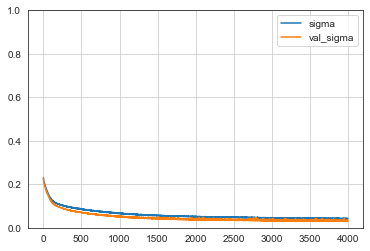

In [19]:
p = {
    'sigma': model_history.history['sigma_mae'],
    'val_sigma': model_history.history['val_sigma_mae'],
}
pd.DataFrame(p).plot()
figsize = (15,10)
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

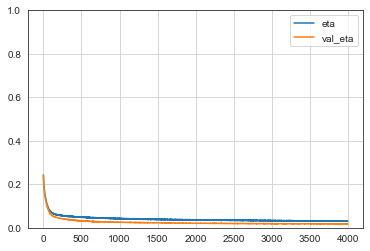

In [20]:
p = {
    'eta': model_history.history['eta_mae'],
    'val_eta': model_history.history['val_eta_mae'],
}
pd.DataFrame(p).plot()
figsize = (15,10)
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [21]:
y5 = y_test.drop(['eta'], 1)
y6 = y_test.drop(['sigma'], 1)
model.evaluate(X_test_scaled, [y5,y6])

45/45 [==============================] - 0s 3ms/step - loss: 0.0036 - sigma_loss: 0.0033 - eta_loss: 3.6259e-04 - sigma_mae: 0.0304 - eta_mae: 0.0150


[0.0036319550126791,
 0.0032693659886717796,
 0.0003625896933954209,
 0.0303832795470953,
 0.015002450905740261]

In [22]:
prediction = model.predict(X_test_scaled)
print(prediction[1])

[[0.57129246]
 [0.7088473 ]
 [0.92687035]
 ...
 [0.13871521]
 [0.9176903 ]
 [0.58645415]]


In [23]:
y_test

,sigma,eta
4631,0.158333,0.583333
13902,0.150000,0.708333
5432,0.825000,0.925000
5421,0.950000,0.458333
3574,0.808333,0.466667
...,...,...
12169,0.241667,0.291667
9957,0.541667,0.041667
8398,0.125000,0.208333
1771,0.666667,0.933333


In [24]:
model.save("dat_training_3_2.h5")

In [25]:
del model

In [41]:
tf.keras.backend.clear_session()
model = tf.keras.models.load_model("dat_training_3_2.h5")

exp = pd.read_csv('exp_ZnOLi0_1000_1.csv', sep=',', engine='python')
X_exp = exp.drop(['fname','deltaX','mX','deltaY','mY'], 1)
X_exp_scaled = scaler.transform(X_exp)

prediction = model.predict(X_exp_scaled)
print(prediction);

[array([[0.6633373 ],
       [0.44366875],
       [0.7737626 ],
       [0.7672949 ],
       [0.567589  ],
       [0.794346  ],
       [0.7826998 ],
       [0.7097985 ],
       [0.77518934],
       [0.8438605 ],
       [0.8408055 ],
       [0.83722746],
       [0.5673005 ],
       [0.91571534],
       [0.4951192 ],
       [0.8070475 ],
       [0.6420119 ],
       [0.42517495],
       [0.91007227],
       [0.6617629 ],
       [0.42966512],
       [0.7692903 ],
       [0.5910075 ],
       [0.76804864],
       [0.7670101 ],
       [0.5184525 ],
       [0.26492244],
       [0.3950969 ],
       [0.7582655 ],
       [0.46030715],
       [0.62368256],
       [0.6682005 ],
       [0.85912406],
       [0.84508646],
       [0.9022888 ],
       [0.43297443],
       [0.94288015],
       [0.8497808 ],
       [0.30766302],
       [0.46814263],
       [0.8842547 ],
       [0.9566607 ],
       [0.5725659 ],
       [0.68878615],
       [0.8962118 ],
       [0.6488878 ],
       [0.9117495 ],
       [0.69

In [42]:
exp["sigma"] = prediction[0]
exp["eta"] = prediction[1]

In [40]:
exp.to_csv('dat_training_3_1_1000_ZnOLiAldrich_exp_output.csv', encoding='utf-8', index=False)